# Time Series Graphs - ETTm2

| Field | date              | HUFL             | HULL              | MUFL               | MULL               | LUFL             | LULL             | OT                        |
|-------|-------------------|------------------|-------------------|--------------------|--------------------|------------------|------------------|---------------------------|
| Description | The recorded date | High UseFul Load | High UseLess Load | Middle UseFul Load | Middle UseLess Load | Low UseFul Load | Low UseLess Load | Oil Temperature (target) |

In [2]:
import sys
sys.path.insert(0, '.')
from utils import *
import pandas as pd

## 1. DataFrames

In [3]:
ettm2 = pd.read_csv('all_six_datasets/ETT-small/ETTm2.csv', parse_dates=['date'])
ettm2.set_index('date', inplace=True)
ettm2

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
...,...,...,...,...,...,...,...
2018-06-26 18:45:00,42.722000,12.230,54.014000,12.652,-11.525,-1.418,45.986500
2018-06-26 19:00:00,38.868000,10.052,49.859001,10.669,-11.525,-1.418,45.986500
2018-06-26 19:15:00,39.622002,11.057,50.448002,11.795,-10.299,-1.418,45.546501


## 2 Time plots

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
def plot_time_series(df, columns, layout=(2, 2), figsize=(20, 12), suptitle='Trends Over Time'):
    """
    Plots trends of time series data in specified layout of subplots.

    Parameters:
    - df: A pandas DataFrame containing the time series data.
    - columns: List of column names to plot.
    - layout: Layout of subplots, format as (rows, cols).
    - figsize: Size of the entire chart, format as (width, height).
    - suptitle: Overall title of the chart.
    """
    rows, cols = layout
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.flatten()  # Flatten the array for easy iteration

    # Plot the time series graph for each specified column
    for i, column in enumerate(columns):
        if i >= len(axs):  # If the number of columns exceeds the number of subplots, break the loop
            break
        df[column].plot(ax=axs[i], title=f'Trends of {column} Over Time')
        axs[i].set_ylabel(column)
        axs[i].grid(True)

    # Hide any unused subplots
    for ax in axs[len(columns):]:
        ax.set_visible(False)

    plt.suptitle(suptitle)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

# Example usage
# Assuming your DataFrame is named national_illness, and you wish to plot the column 'ILITOTAL',
# you could call the function like this: plot_time_series(national_illness, ['ILITOTAL'], layout=(2, 3))


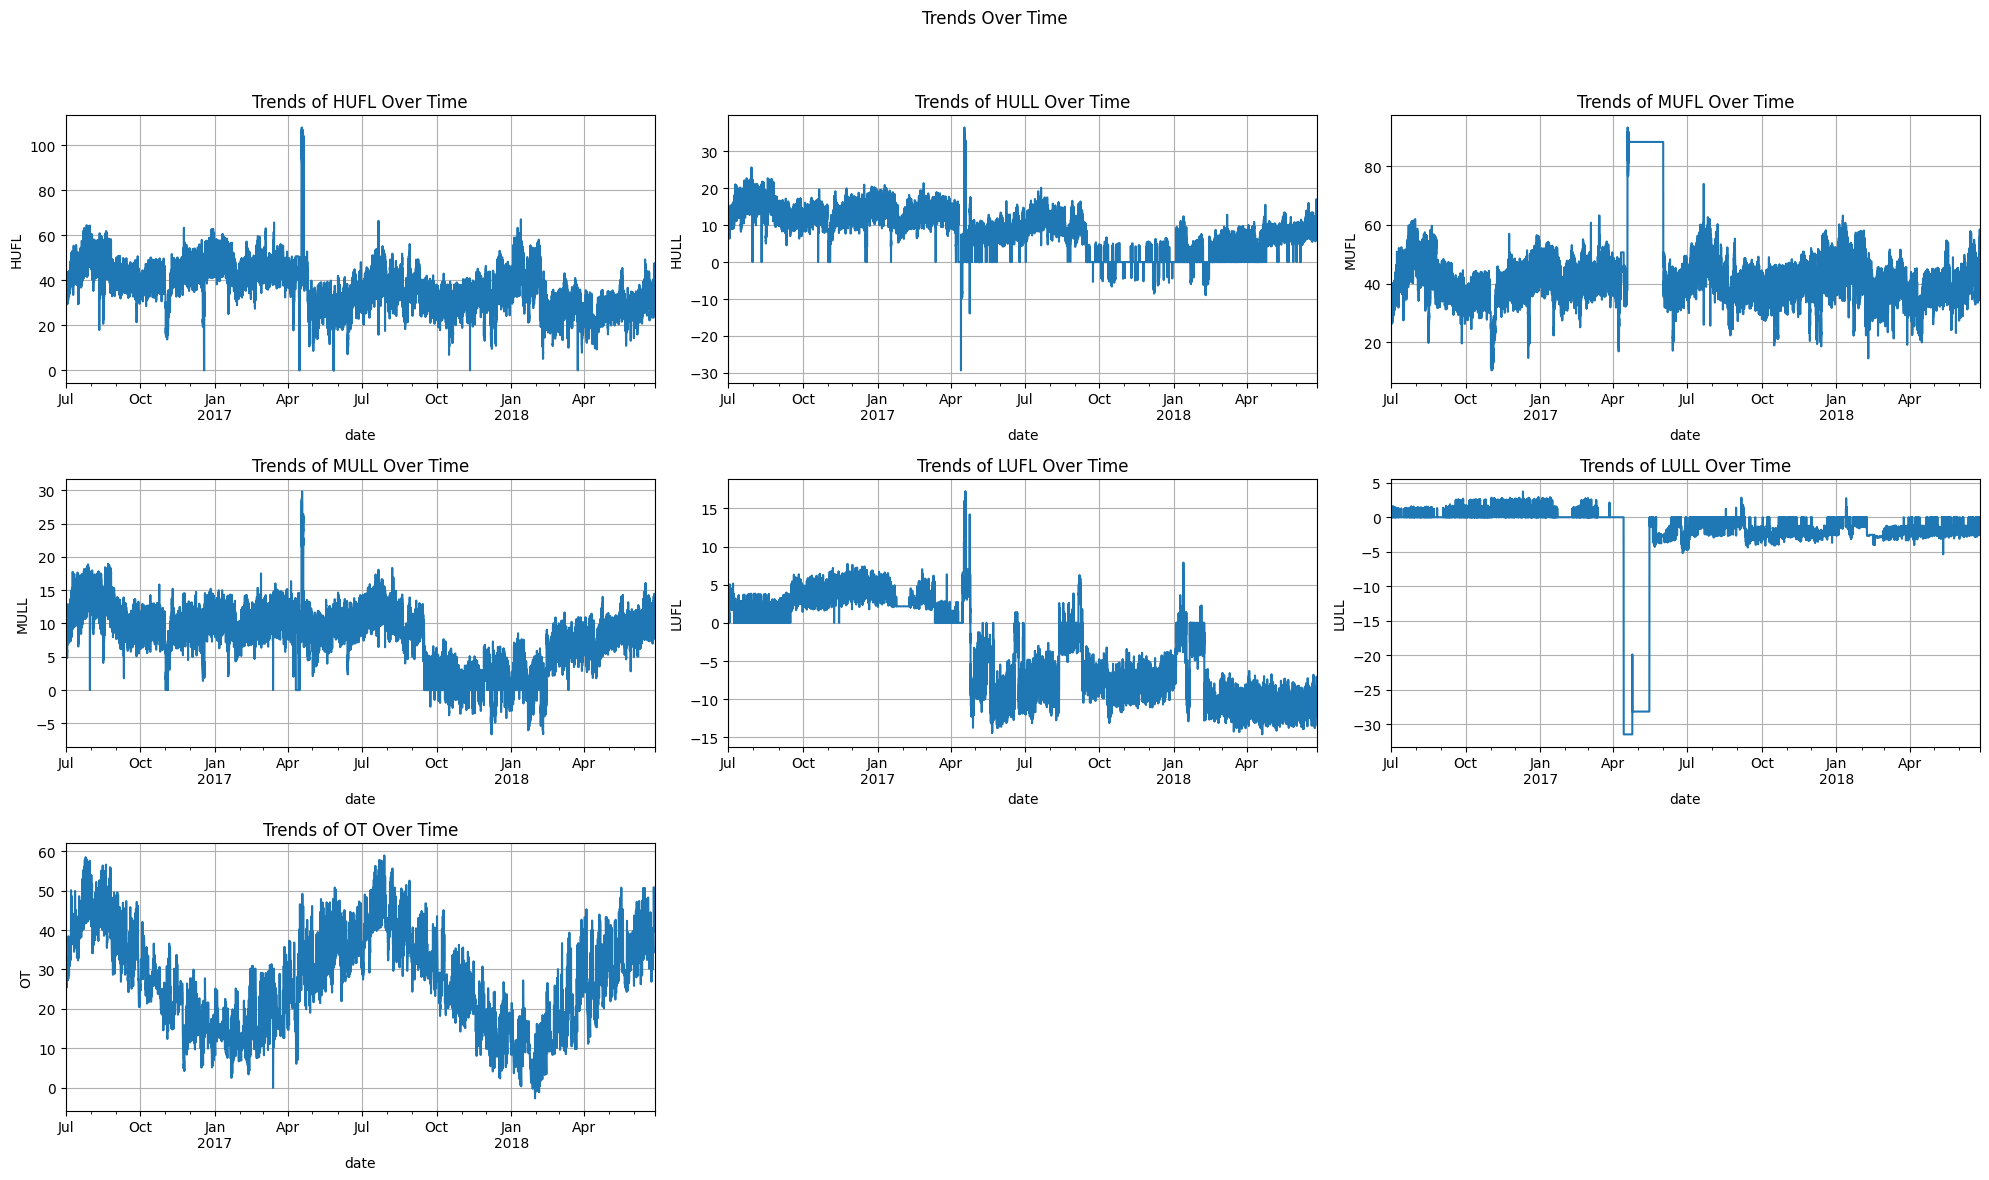

In [6]:
plot_time_series(ettm2, 
                 ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], 
                 layout=(3, 3))

## 3 Seasonal plots

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
def plot_seasonal_trends_with_legends(df, columns, layout=(3, 2), period='DayOfYear', cmap='viridis'):
    """
    Plots one or more seasonal trend graphs in specified layout of subplots, with legends for years displayed on the right side of the chart.

    Parameters:
    - df: A pandas DataFrame containing the time series data, with a DatetimeIndex.
    - columns: A single column name or a list of column names to plot.
    - layout: Layout of subplots, format as (rows, cols).
    - period: Seasonal feature created based on the index, can be 'DayOfYear', 'WeekOfYear', or 'Month'.
    - cmap: Name of the colormap scheme.
    """
    # Ensure columns are in list form, even if it's just one column
    if isinstance(columns, str):
        columns = [columns]
    
    # Add columns for year and the selected period
    df['Year'] = df.index.year
    if period == 'DayOfYear':
        df['Period'] = df.index.dayofyear
    elif period == 'WeekOfYear':
        df['Period'] = df.index.isocalendar().week
    elif period == 'Month':
        df['Period'] = df.index.month
    else:
        raise ValueError(f"Unsupported period '{period}'. Choose from 'DayOfYear', 'WeekOfYear', or 'Month'.")

    rows, cols = layout
    fig, axs = plt.subplots(rows, cols, figsize=(cols*7, rows*5))
    
    # Wrap axs in a list if it's a single subplot
    if not isinstance(axs, np.ndarray):
        axs = [axs]
    else:
        axs = axs.flatten()  # Flatten the array for easy iteration

    for i, column in enumerate(columns):
        if i < len(axs):  # Only plot if there are enough subplots
            ax = axs[i]
            years = df['Year'].unique()
            color_palette = sns.color_palette(cmap, n_colors=len(years))
            
            for j, year in enumerate(sorted(years)):
                yearly_data = df[df['Year'] == year]
                ax.plot(yearly_data['Period'], yearly_data[column], label=year, color=color_palette[j])

            ax.set_title(f'{column}')
            ax.set_xlabel('Period')
            ax.set_ylabel(column)
        else:
            break  # Stop plotting if there are more columns than subplots

    # Hide any excess subplots
    for i in range(len(columns), len(axs)):
        axs[i].axis('off')
    
    # Place the legend to the right of the last subplot
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), title='Year')

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# Example usage
# Assuming your DataFrame is named df, with a DatetimeIndex and numeric columns you wish to plot in subplots.
# For a single column name: plot_seasonal_trends_with_legends(df, 'Column1', layout=(1, 1))
# For multiple column names: plot_seasonal_trends_with_legends(df, ['Column1', 'Column2'], layout=(1, 2))


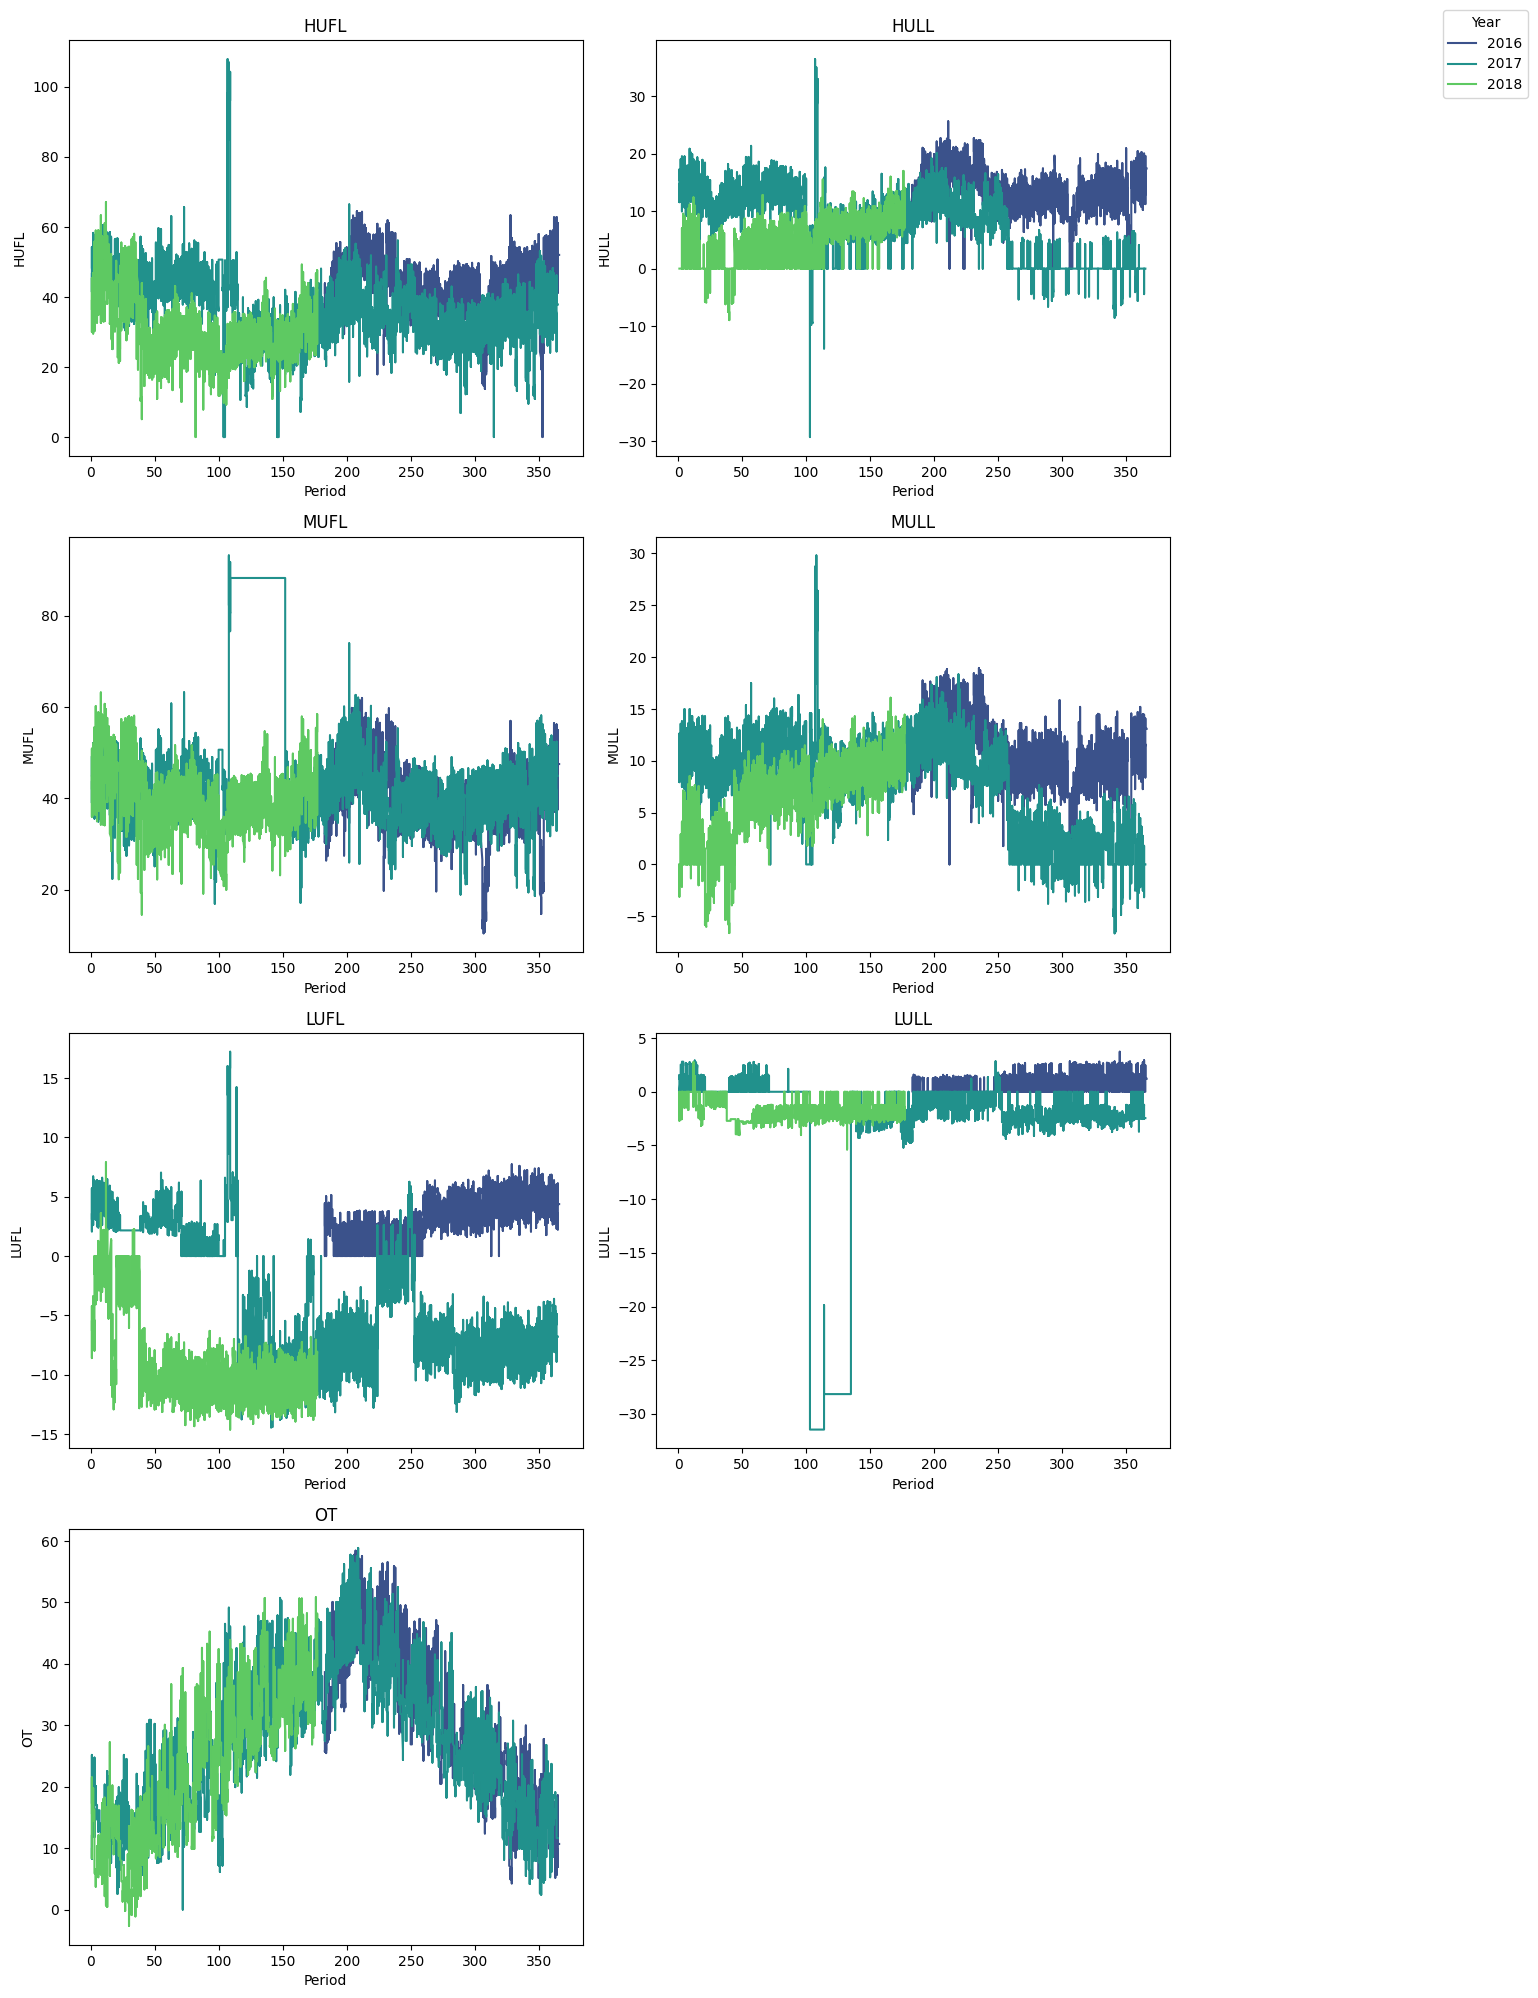

In [9]:
plot_seasonal_trends_with_legends(ettm2, ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], layout=(4, 2), period='DayOfYear', cmap='viridis')

## 4 Heatmaps of Correlation Matrices

### 4.1 Heatmap of Correlation Matrix for Entire Dataset

          HUFL      HULL      MUFL      MULL      LUFL      LULL        OT
HUFL  1.000000  0.670538  0.200455  0.526395  0.668914  0.154407  0.034204
HULL  0.670538  1.000000  0.117103  0.913658  0.593954  0.200188  0.336797
MUFL  0.200455  0.117103  1.000000  0.250331 -0.069660 -0.598866  0.194224
MULL  0.526395  0.913658  0.250331  1.000000  0.353747  0.010578  0.495151
LUFL  0.668914  0.593954 -0.069660  0.353747  1.000000  0.167905 -0.144055
LULL  0.154407  0.200188 -0.598866  0.010578  0.167905  1.000000 -0.112644
OT    0.034204  0.336797  0.194224  0.495151 -0.144055 -0.112644  1.000000


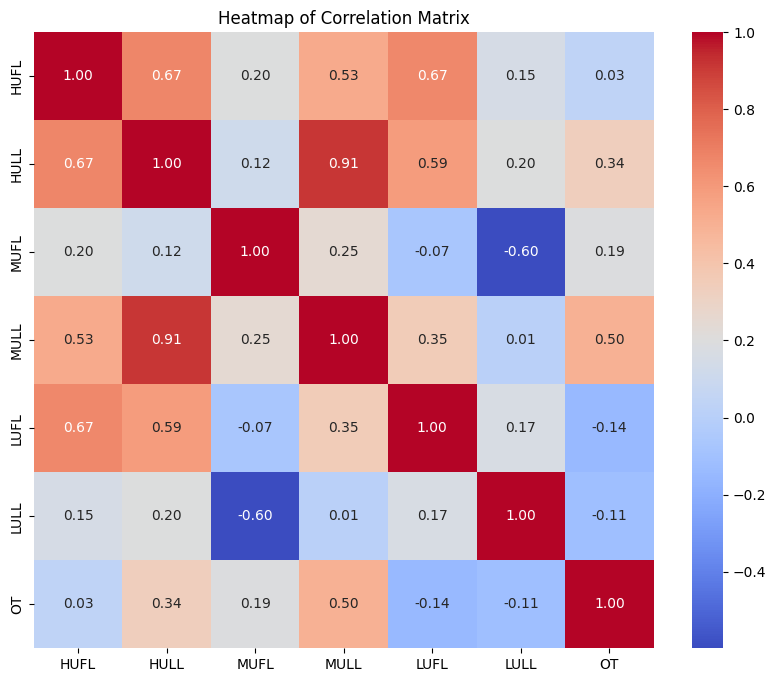

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace with your CSV file path
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'

# Read the data, assuming each column is a feature and each row is a time step
df = pd.read_csv(file_path)

# If there's a datetime column in the DataFrame, remove it (assuming the column name is 'date')
if 'date' in df.columns:
    df = df.drop('date', axis=1)

# Ensure the DataFrame contains only numeric data
df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


### 4.2 Heatmap of Correlation Matrix for sgemented Dataset

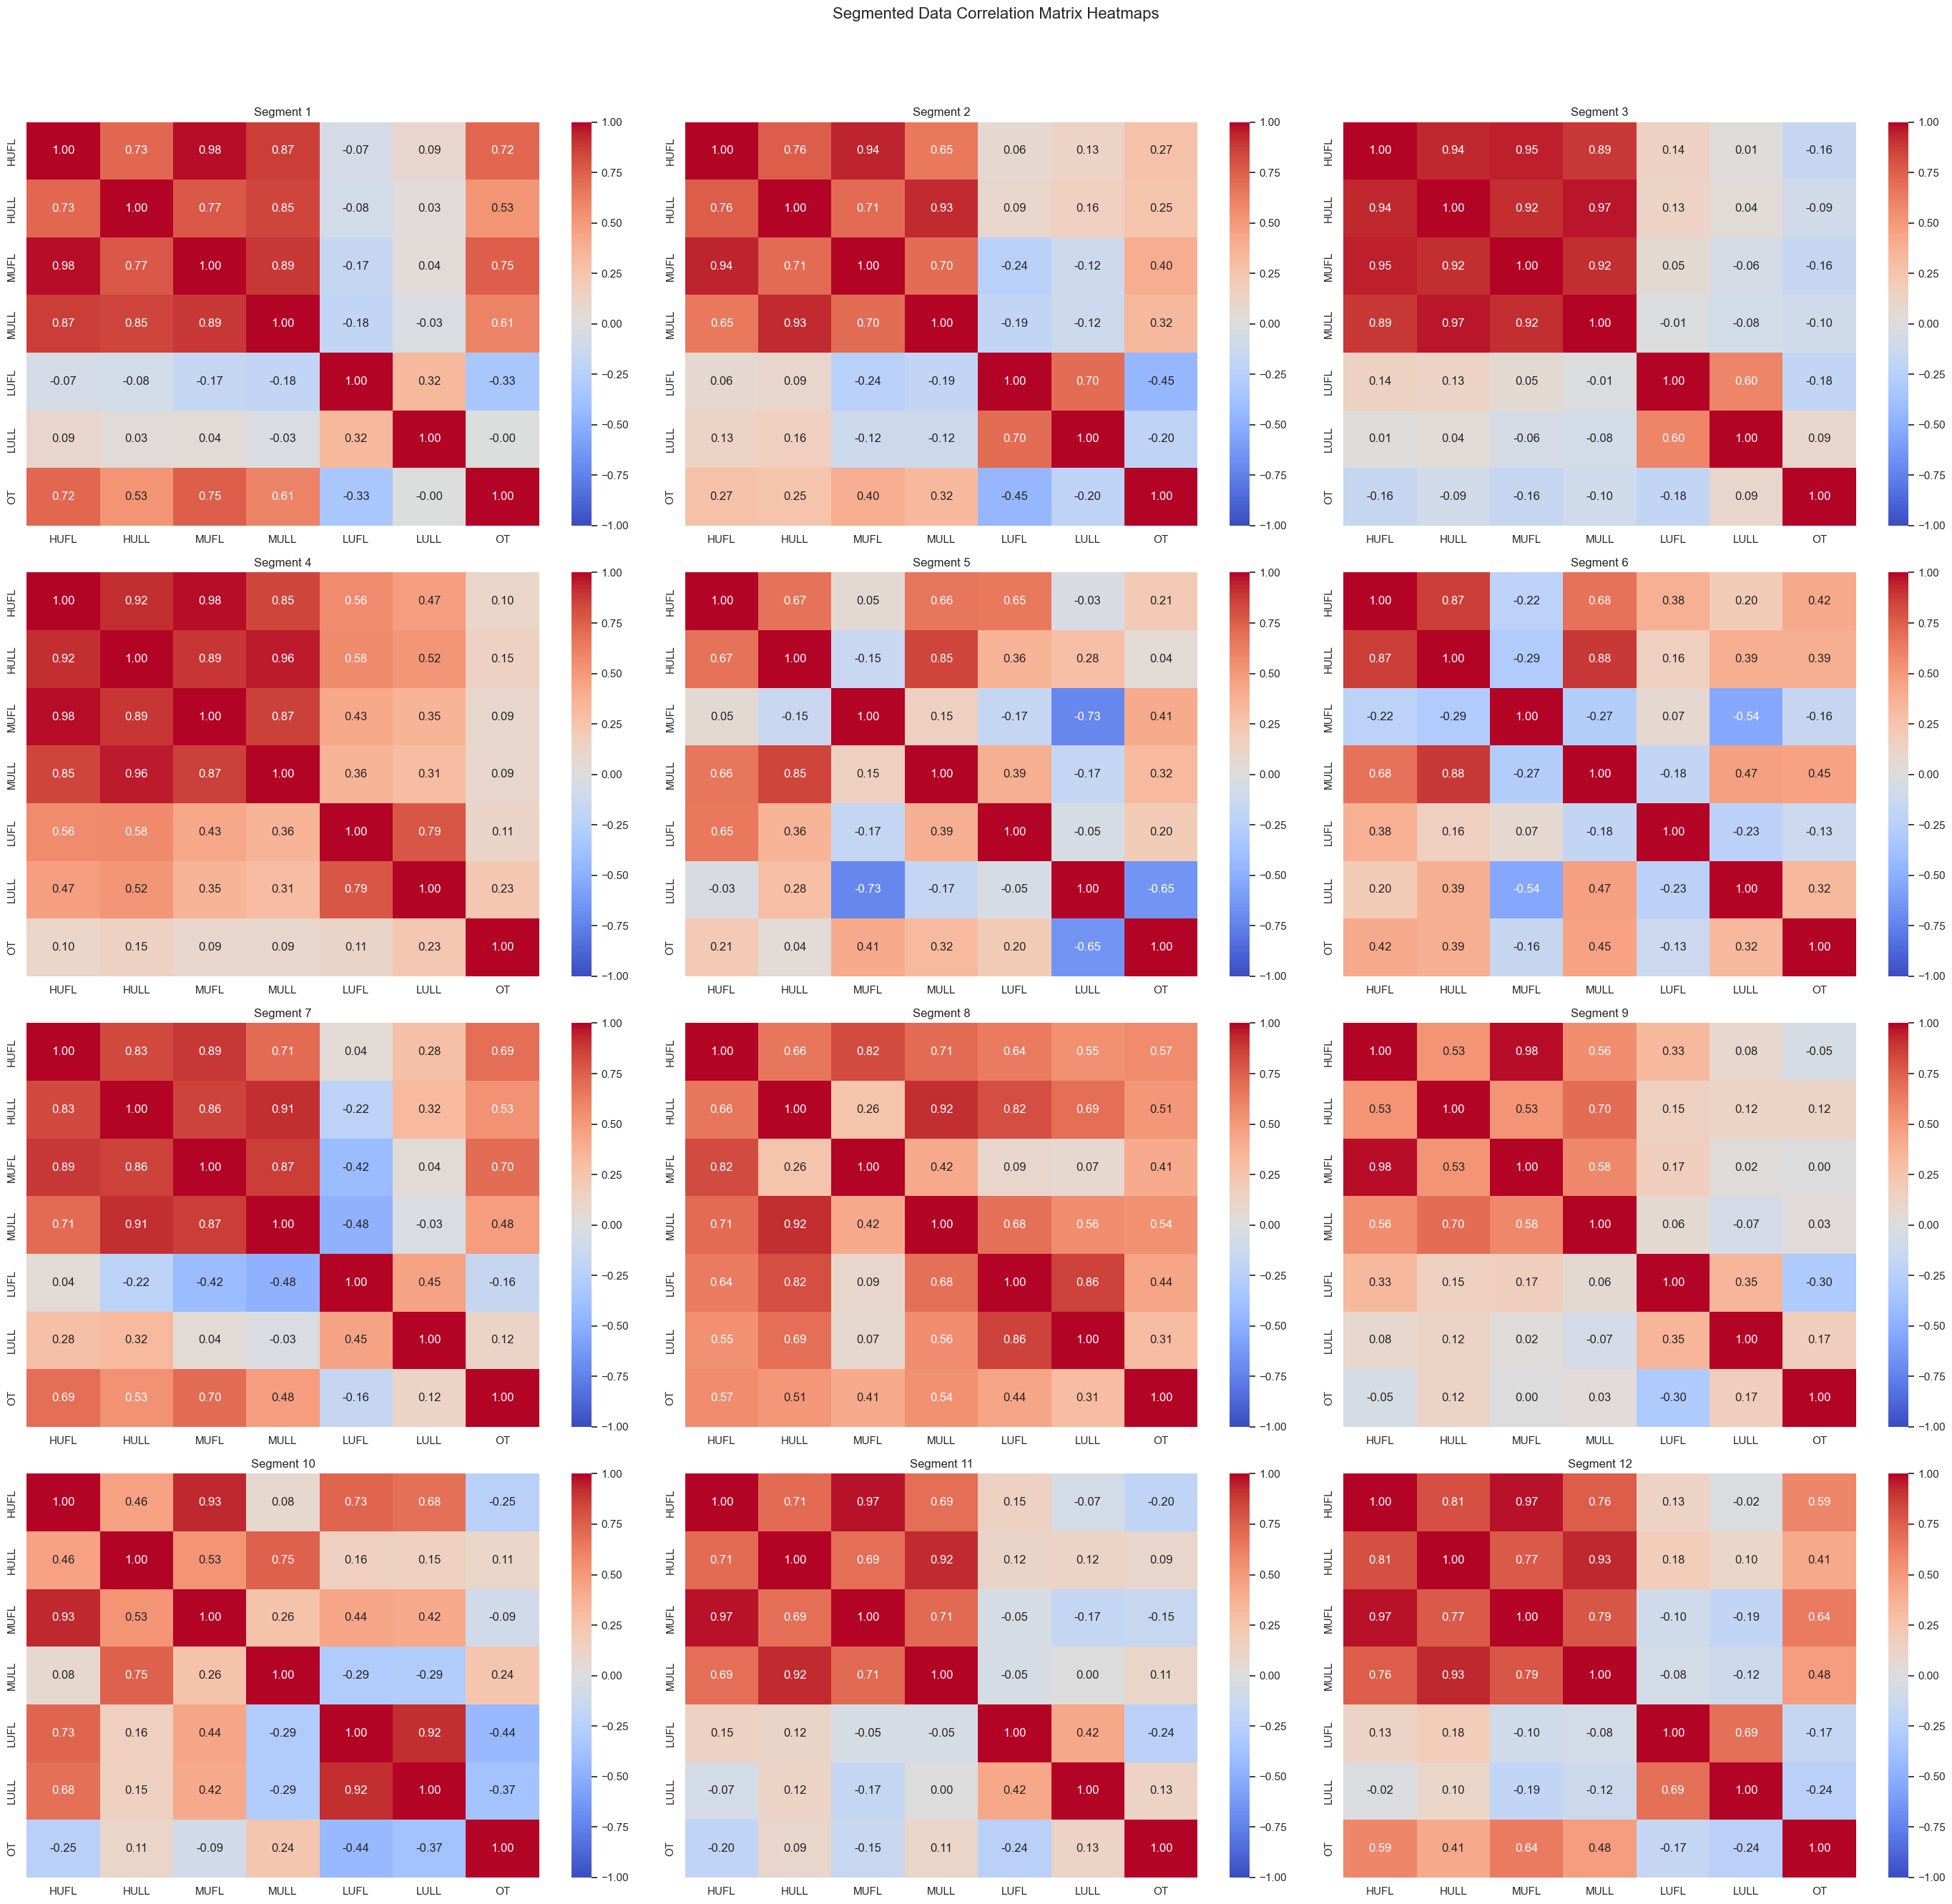

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'
df = pd.read_csv(file_path)

# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Total number of segments
total_segments = 12

# Calculate the number of rows each time segment should contain, using integer division to ensure an integer result
segment_size = df.shape[0] // total_segments

# Set the plotting style
sns.set(style="white")

# Prepare to plot multiple subplots, 4 rows by 3 columns
fig, axes = plt.subplots(4, 3, figsize=(28, 28))  # Overall size of the figure
fig.suptitle('Segmented Data Correlation Matrix Heatmaps', fontsize=16)

# Iterate through each time segment and plot the correlation matrix heatmap on a subplot
for segment in range(total_segments):
    # Calculate the starting and ending row for the current segment
    start_row = segment * segment_size
    # For the last segment, ensure it contains all remaining rows
    end_row = start_row + segment_size if segment < total_segments - 1 else df.shape[0]
    segment_df = df_numeric.iloc[start_row:end_row]
    
    # Calculate the correlation matrix for the current segment
    correlation_matrix = segment_df.corr()
    
    # Find the corresponding subplot location
    ax = axes[segment // 3, segment % 3]
    
    # Plot the heatmap on the subplot
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f'Segment {segment + 1}')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Generating GIF

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'
df = pd.read_csv(file_path)

# Total number of segments now set to 100
total_segments = 100

# Calculate the number of rows each time segment should contain, using integer division
segment_size = df.shape[0] // total_segments

# Directory to save plots
plots_dir = 'temp_plots'
os.makedirs(plots_dir, exist_ok=True)

# Generate and save plots
for segment in range(total_segments):
    start_row = segment * segment_size
    end_row = start_row + segment_size if segment < total_segments - 1 else df.shape[0]
    segment_df = df.iloc[start_row:end_row].select_dtypes(include=[np.number])
    correlation_matrix = segment_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Segment {segment + 1}')
    
    # Save plot as image
    plt.savefig(f'{plots_dir}/segment_{segment + 1}.png')
    plt.close()


In [2]:
from PIL import Image
import numpy as np
import os

def interpolate_frames(image1, image2, steps=1):
    """
    Generate interpolated frames between two images.
    :param image1: PIL Image object for the first image.
    :param image2: PIL Image object for the second image.
    :param steps: Number of interpolated frames to generate between the two images.
    :return: List of PIL Image objects, including the first image, interpolated images, but excluding the second image.
    """
    images = [image1]
    for step in range(1, steps + 1):
        alpha = step / (steps + 1)
        interpolated_image = Image.blend(image1, image2, alpha)
        images.append(interpolated_image)
    return images

# Path to the folder containing the images
image_folder = 'temp_plots'

# Number of interpolation steps between each original frame
interpolation_steps = 2  # Adjust this to add more or fewer interpolated frames

# Adjust based on actual number of images
image_files = [os.path.join(image_folder, f'segment_{i}.png') for i in range(1, 101)]

# Load all images using Pillow
images = [Image.open(image_file).convert("RGBA") for image_file in image_files]

# Insert interpolated frames between original frames to make the animation smoother
smoothed_images = []
for i in range(len(images) - 1):
    smoothed_images.extend(interpolate_frames(images[i], images[i+1], steps=interpolation_steps))
smoothed_images.append(images[-1])  # Add the last frame

# Durations for the GIFs
durations = [100, 300, 500]

# Generate GIFs with different durations
for duration in durations:
    gif_path = f'smooth_output_{duration}.gif'  # Modify GIF path to include duration
    smoothed_images[0].save(gif_path, save_all=True, append_images=smoothed_images[1:], optimize=False, duration=duration, loop=0)
    print(f'GIF with duration {duration}ms has been saved to {gif_path}')


GIF with duration 100ms has been saved to smooth_output_100.gif
GIF with duration 300ms has been saved to smooth_output_300.gif
GIF with duration 500ms has been saved to smooth_output_500.gif


## 5 Scatterplots

### Pair plots

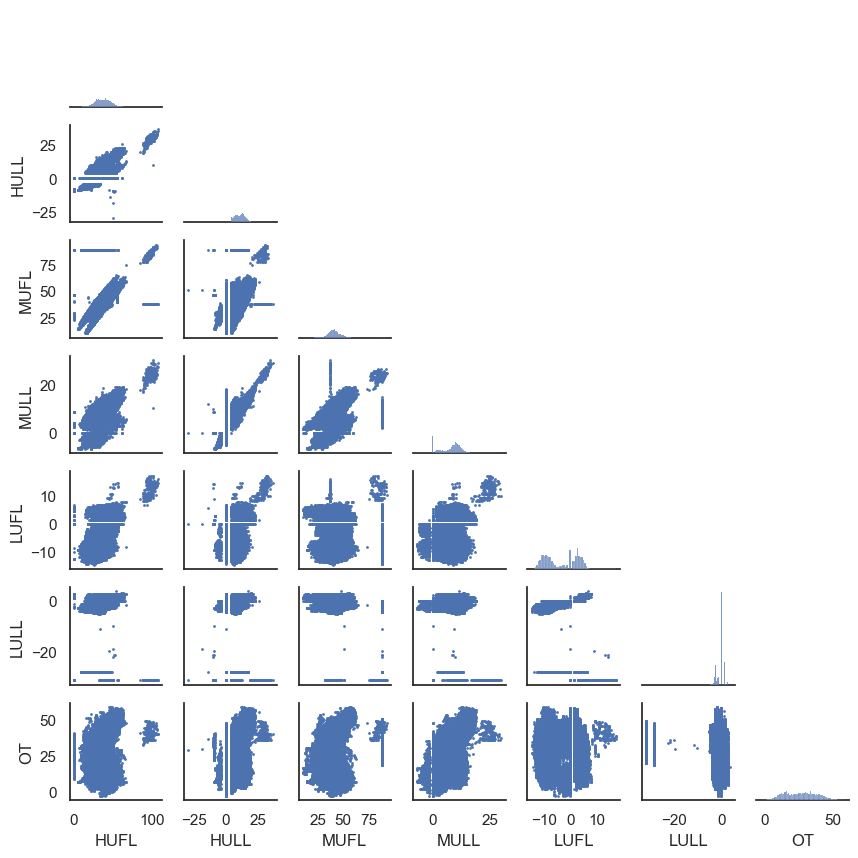

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset and removed the date column, use a similar naming convention `data_no_date` to represent this dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'
data = pd.read_csv(file_path)
data_no_date = data.drop(columns=['date'])

# Generate pair plots using seaborn's pairplot function
# Note, based on actual conditions you might need to adjust parameters in plot_kws like linewidth and size of dots, as well as the height of the plot
sns.pairplot(data_no_date, plot_kws=dict(linewidth=0, s=4), corner=True, height=1.25)
plt.tight_layout()  # Ensure the layout is neat
plt.show()


## 6 Lag plots

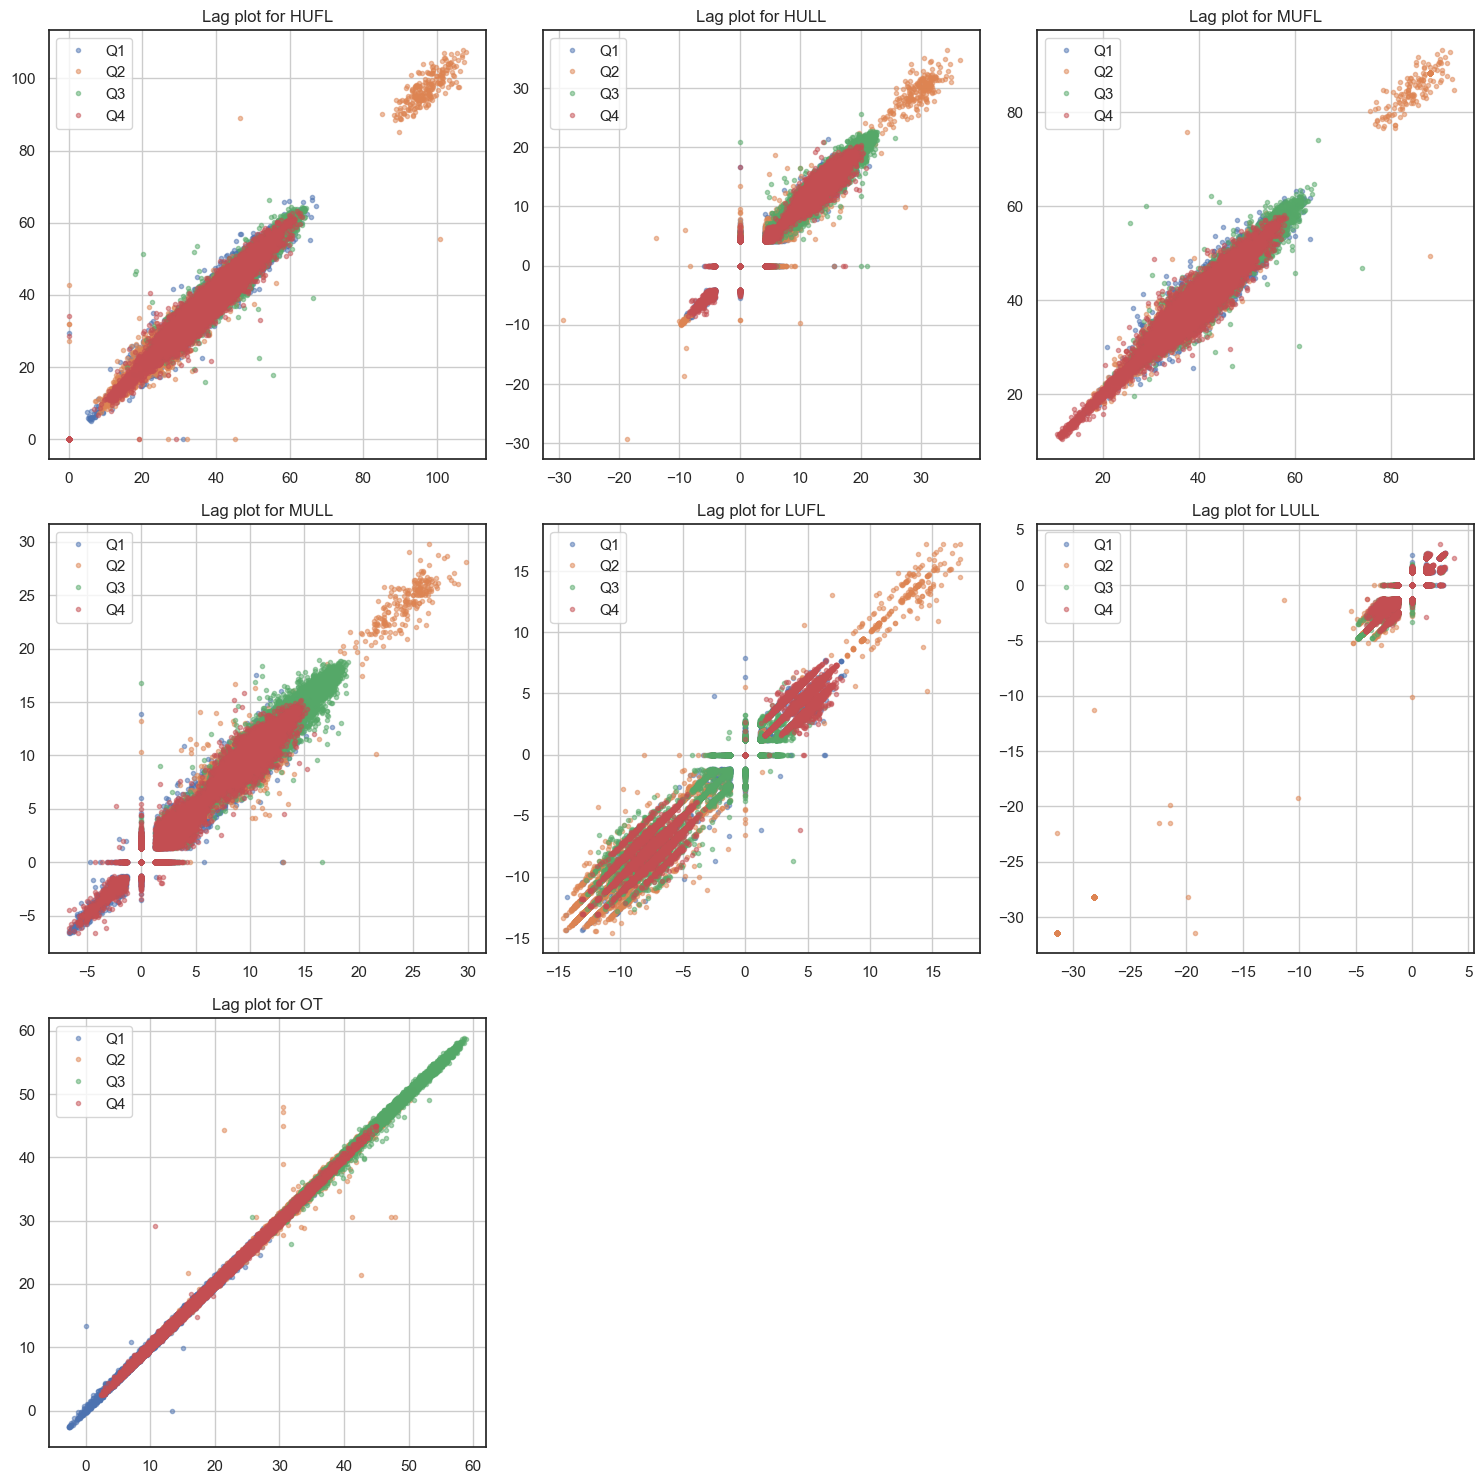

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Load the dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'
data = pd.read_csv(file_path, parse_dates=['date'])
data.set_index('date', inplace=True)

# Get the names of all columns except the date
columns = data.columns.tolist()

# Determine the number of rows and columns for the subplots
n = len(columns)
cols = 3  # 3 columns
rows = n // cols + (1 if n % cols else 0)  # calculate the number of rows needed

# Create a canvas for the Lag plots, 3 per row
fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows), squeeze=False)

# Plot the Lag plot for each variable
for i, col in enumerate(columns):
    ax = axs[i // cols, i % cols]
    for q in range(1, 5):  # assuming quarters from 1 to 4
        # Select data corresponding to the quarter
        quarter_data = data[data.index.quarter == q]
        # Plot the Lag plot
        ax.plot(quarter_data[col].shift(1), quarter_data[col], '.', alpha=0.5, label=f'Q{q}')
    ax.set_title(f'Lag plot for {col}')
    ax.legend()
    ax.grid(True)

# Remove any excess subplot axes
for j in range(i + 1, rows * cols):
    fig.delaxes(axs[j // cols, j % cols])

# Adjust the layout
plt.tight_layout()
plt.show()


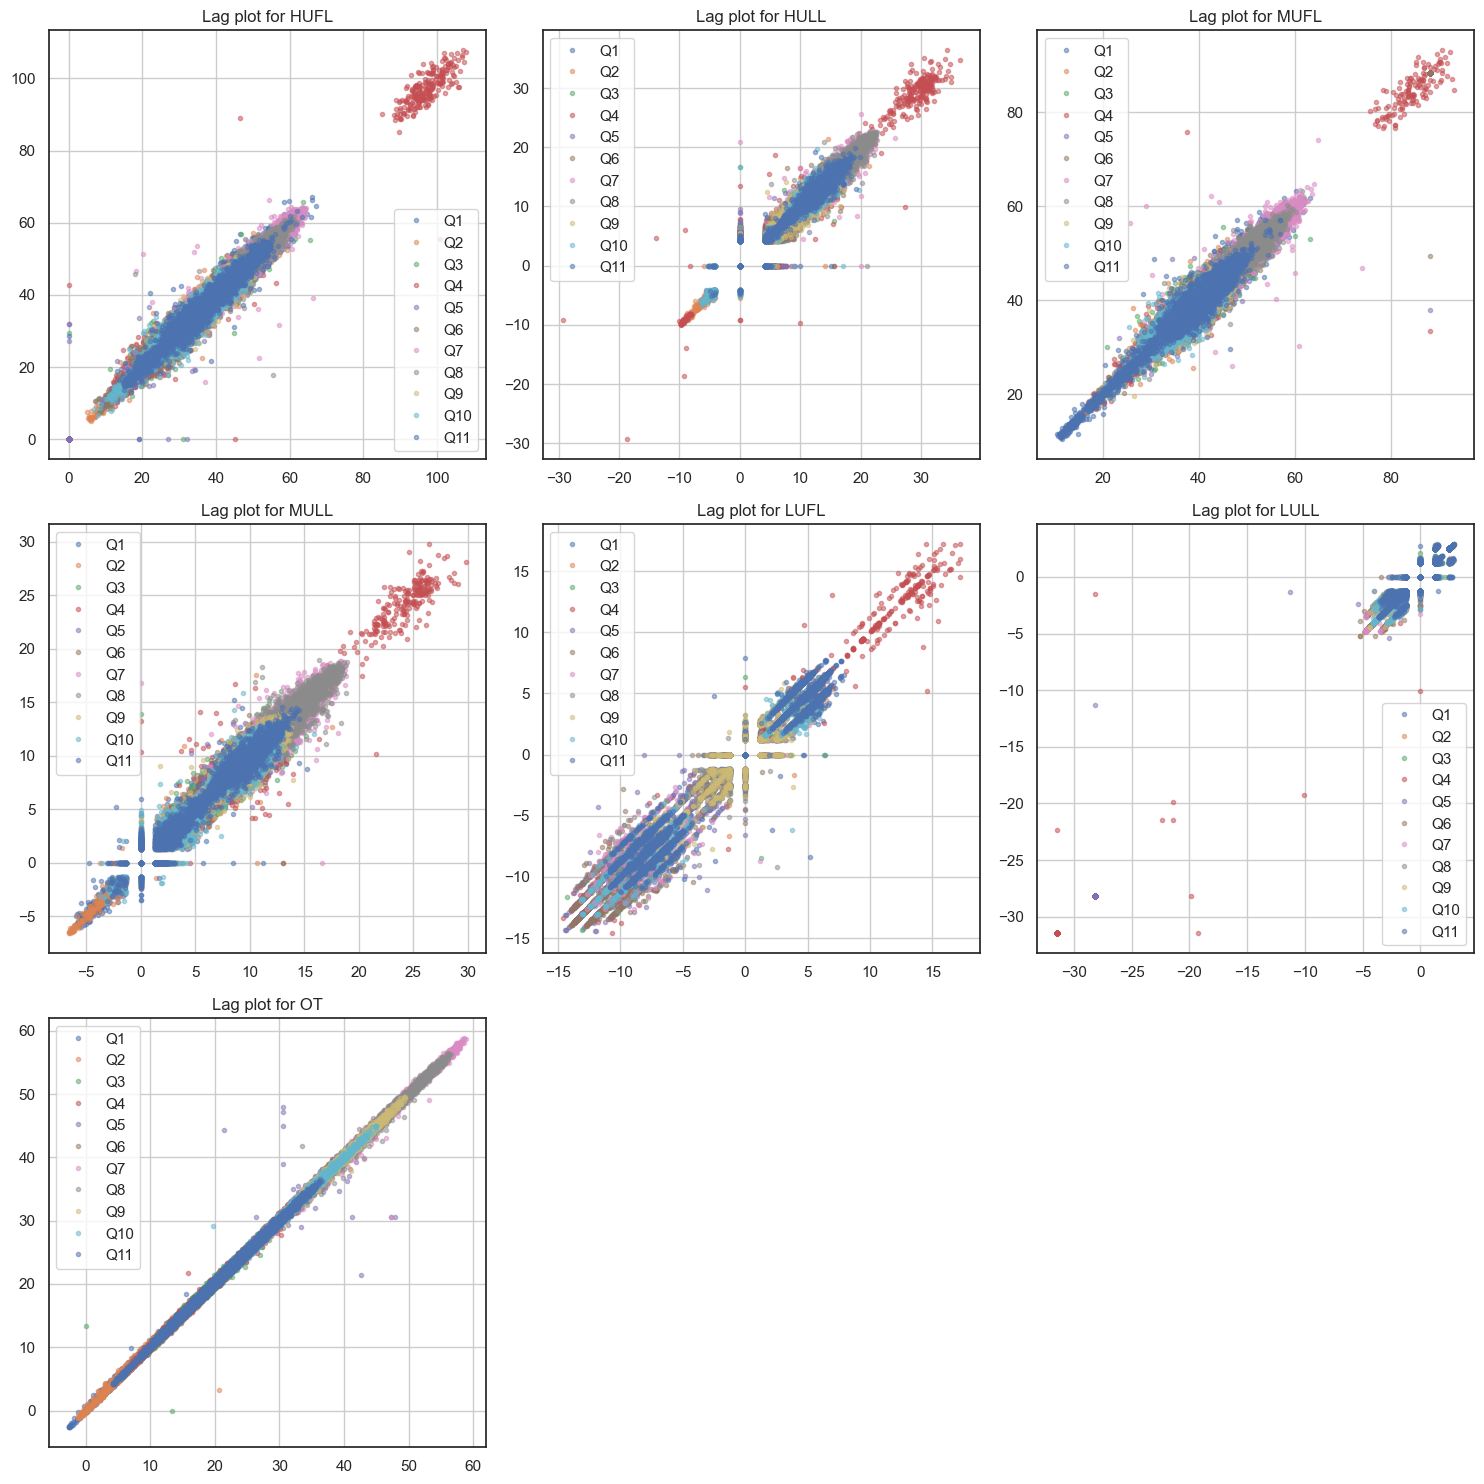

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Load the dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'
data = pd.read_csv(file_path, parse_dates=['date'])
data.set_index('date', inplace=True)

# Get the names of all columns except the date
columns = data.columns.tolist()

# Determine the number of rows and columns for the subplots
n = len(columns)
cols = 3  # 3 columns
rows = n // cols + (1 if n % cols else 0)  # calculate the number of rows needed

# Create a canvas for the Lag plots, 3 per row
fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows), squeeze=False)

# Plot the Lag plot for each variable
for i, col in enumerate(columns):
    ax = axs[i // cols, i % cols]
    for q in range(1, 12):  # assuming quarters from 1 to 4
        # Select data corresponding to the quarter
        quarter_data = data[data.index.month == q]
        # Plot the Lag plot
        ax.plot(quarter_data[col].shift(1), quarter_data[col], '.', alpha=0.5, label=f'Q{q}')
    ax.set_title(f'Lag plot for {col}')
    ax.legend()
    ax.grid(True)

# Remove any excess subplot axes
for j in range(i + 1, rows * cols):
    fig.delaxes(axs[j // cols, j % cols])

# Adjust the layout
plt.tight_layout()
plt.show()


## 7 Autocorrelation

The first code snippet offers parameters to specify the number of lags (`lags=40`) and the confidence interval (`alpha=0.05`), whereas the second code snippet automatically calculates the number of lags and does not provide an option to display the confidence interval. This leads to differences in the number of lags and, consequently, variations in the visualization of the autocorrelation plots.

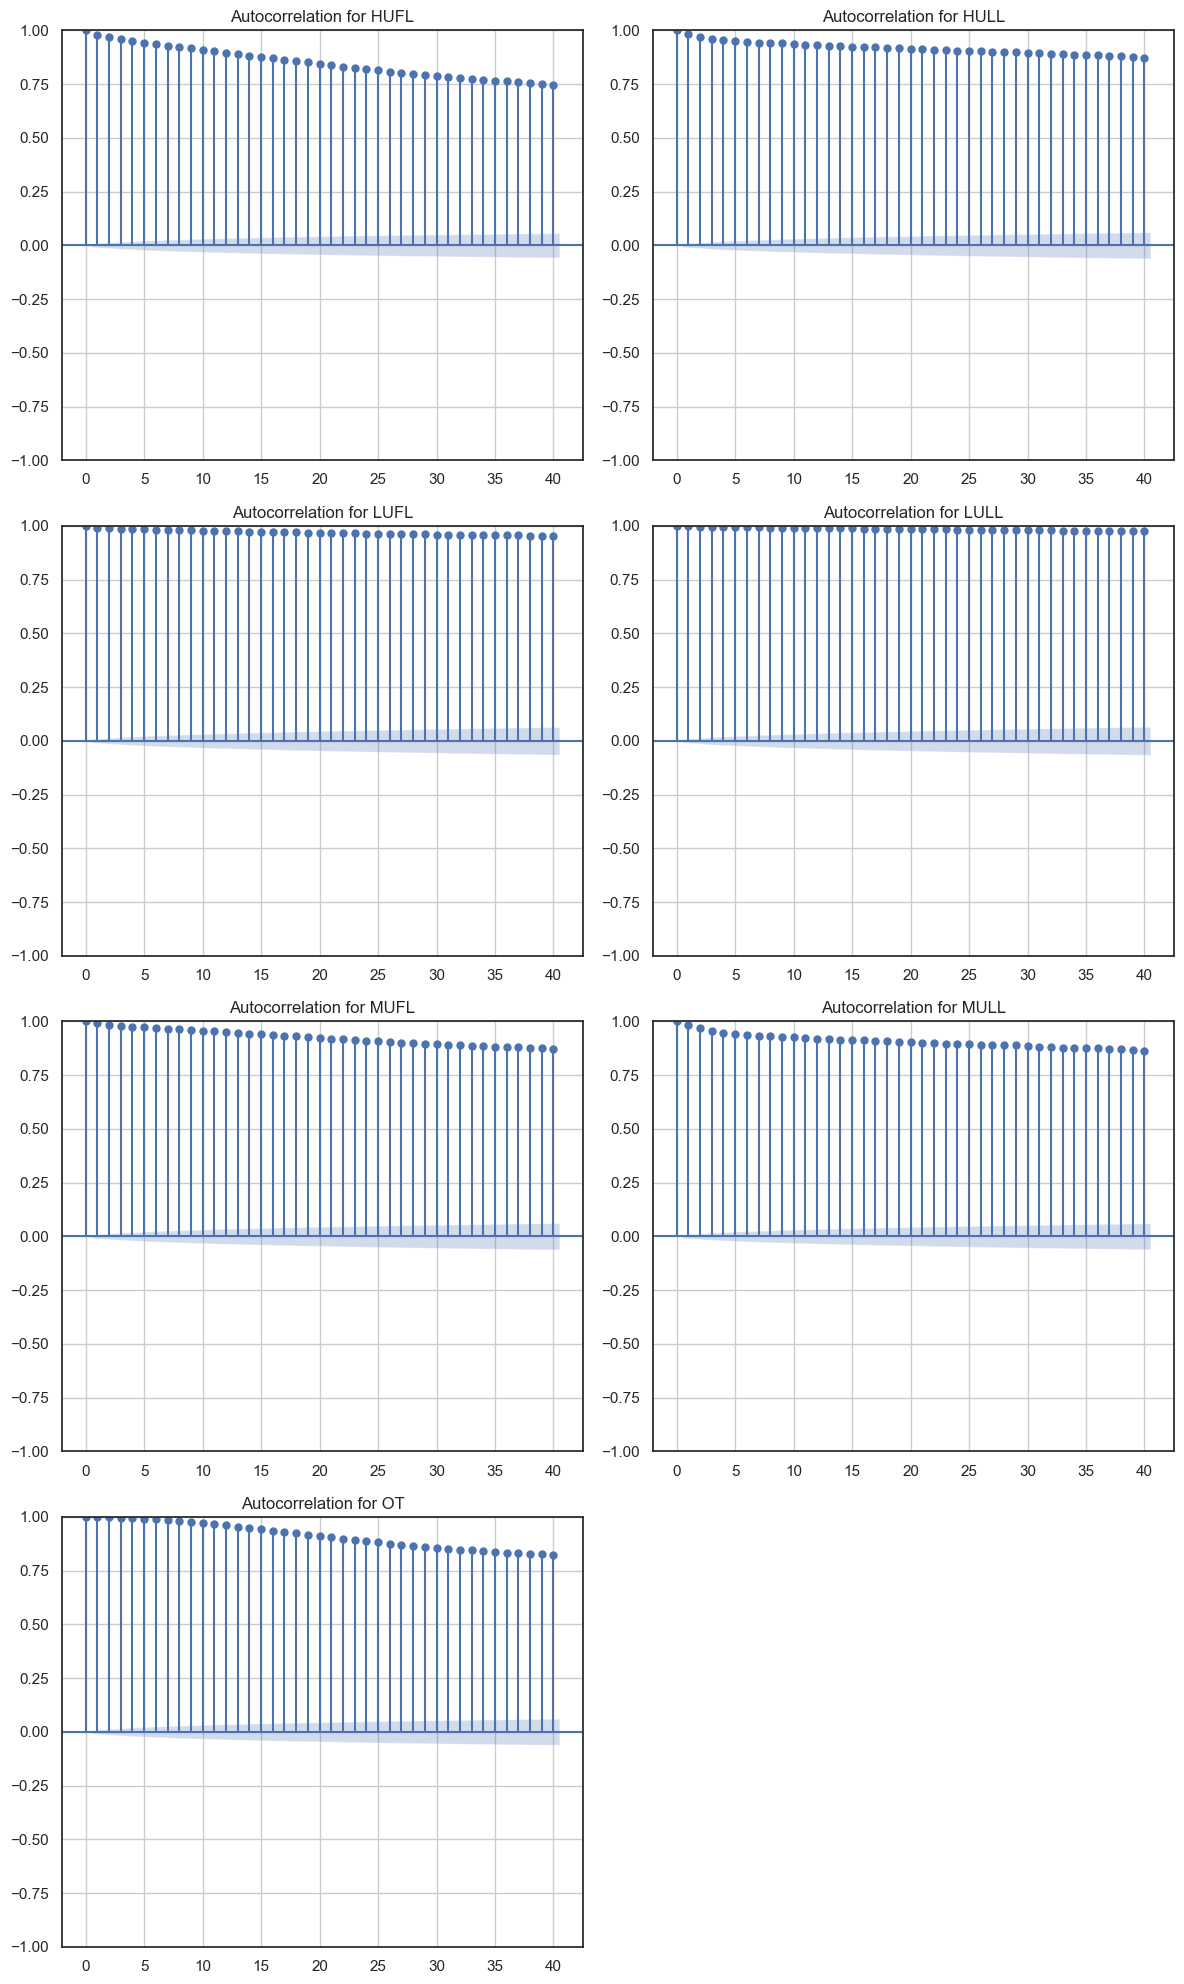

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'
data = pd.read_csv(file_path, parse_dates=['date'])
data.set_index('date', inplace=True)

# Get all column names except for 'date'
columns = data.columns.difference(['date'])

# Calculate the number of rows, two plots per row
rows = len(columns) // 2 + (len(columns) % 2)

# Create the canvas, two autocorrelation plots per row
fig, axs = plt.subplots(rows, 2, figsize=(12, 5*rows))

# Ensure axs is two-dimensional for easy indexing
if rows == 1:
    axs = axs.reshape(1, -1)

# Plot the autocorrelation for each variable
for i, col in enumerate(columns):
    ax = axs[i // 2, i % 2]
    sm.graphics.tsa.plot_acf(data[col], ax=ax, lags=40, alpha=0.05, title=f'Autocorrelation for {col}')
    ax.set_ylim(-1, 1)
    ax.grid(True)

# If the number of columns is odd, remove the last, unneeded subplot
if len(columns) % 2:
    fig.delaxes(axs[-1, -1])

# Adjust the layout
plt.tight_layout()
plt.show()


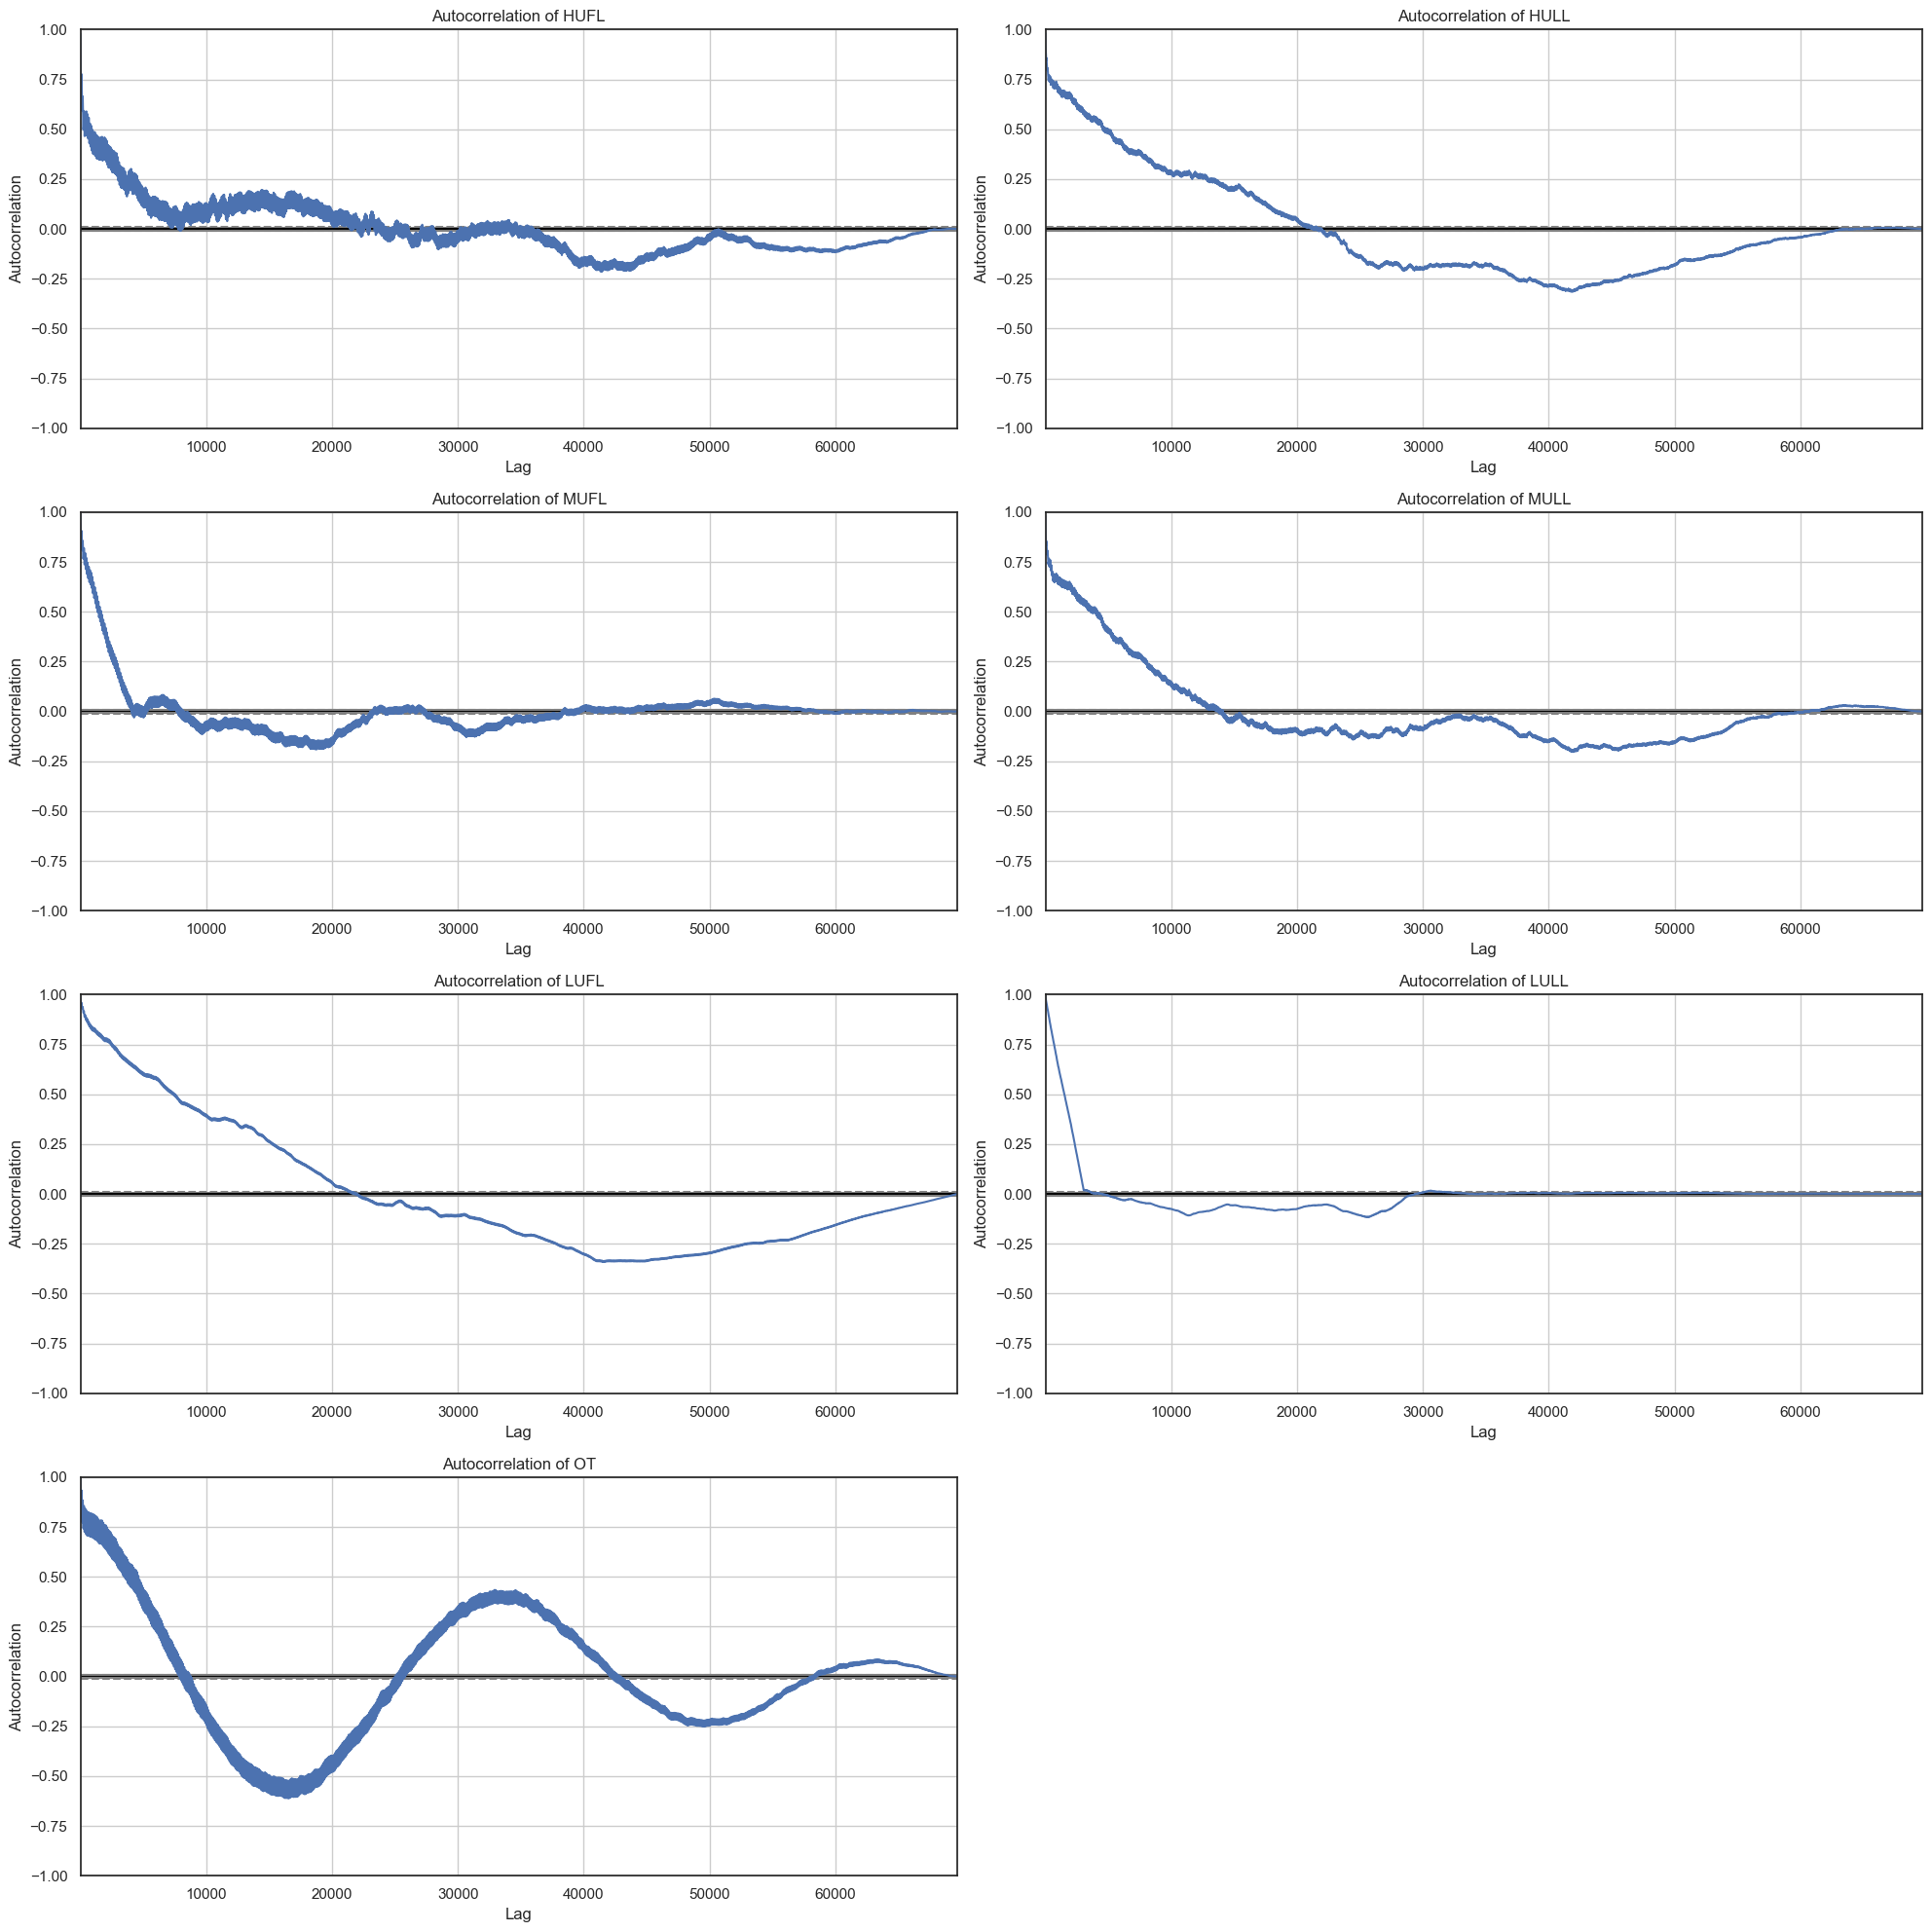

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pathlib import Path

# Set the file path
file_path = Path('all_six_datasets/ETT-small/ETTm2.csv')

# Read the data
df = pd.read_csv(file_path)

# Remove non-numeric columns (such as the date column)
df = df.select_dtypes(include=[np.number])

# Determine the number of charts per row and the total number of rows
plots_per_row = 2
num_rows = np.ceil(df.shape[1] / plots_per_row).astype(int)

# Create a large canvas
plt.figure(figsize=(plots_per_row * 10, num_rows * 5))  # Adjust size as needed

# Draw the autocorrelation plot for each column
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, plots_per_row, i + 1)
    autocorrelation_plot(df[column])
    plt.title(f'Autocorrelation of {column}')

plt.tight_layout()
plt.show()


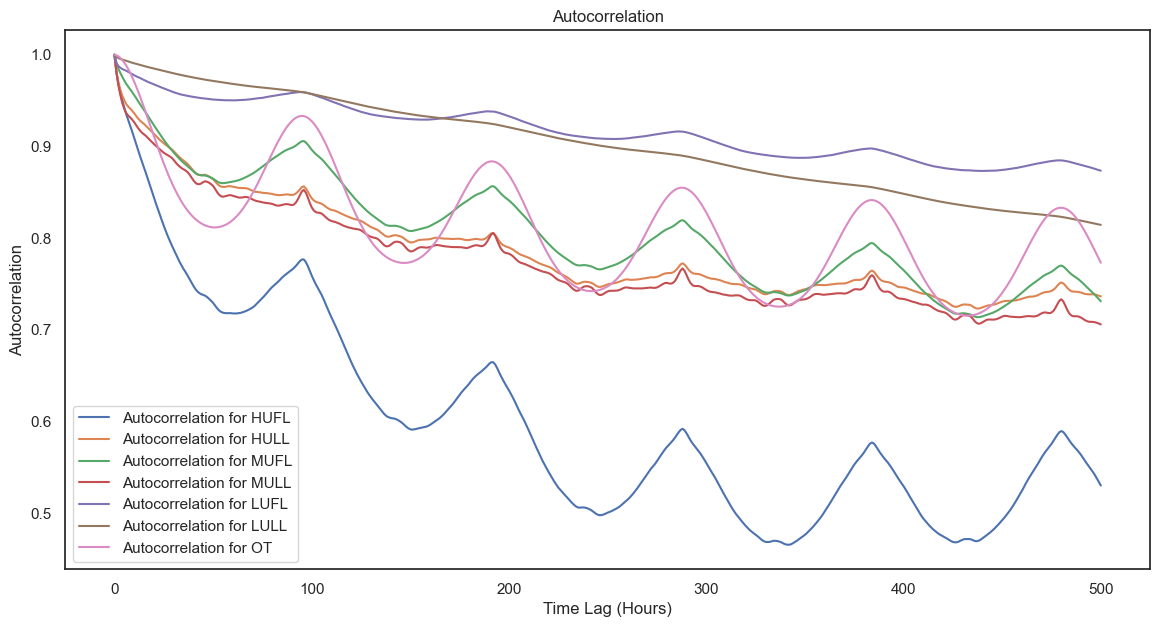

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from pathlib import Path

# Set the file path
file_path = Path('all_six_datasets/ETT-small/ETTm2.csv')

# Read the data
df = pd.read_csv(file_path)

# Remove the date column
df = df.drop(columns=['date'])

# Compute autocorrelation and plot
plt.figure(figsize=(14, 7))  # Set the figure size

for column in df.columns:
    # Calculate the autocorrelation coefficients for each column
    lag_acf = acf(df[column], nlags=500)
    plt.plot(lag_acf, label=f'Autocorrelation for {column}')

plt.title('Autocorrelation')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()  # Show legend
plt.show()


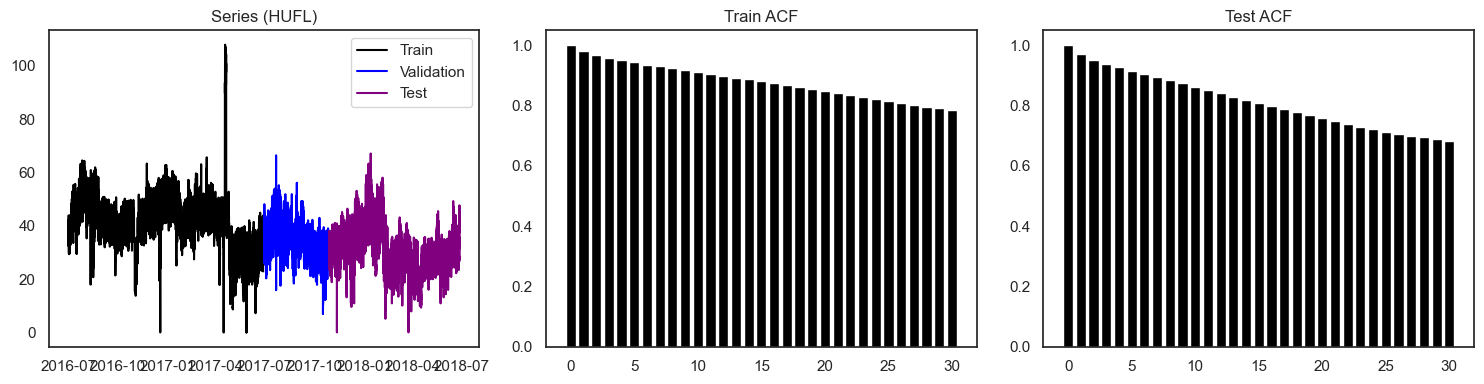

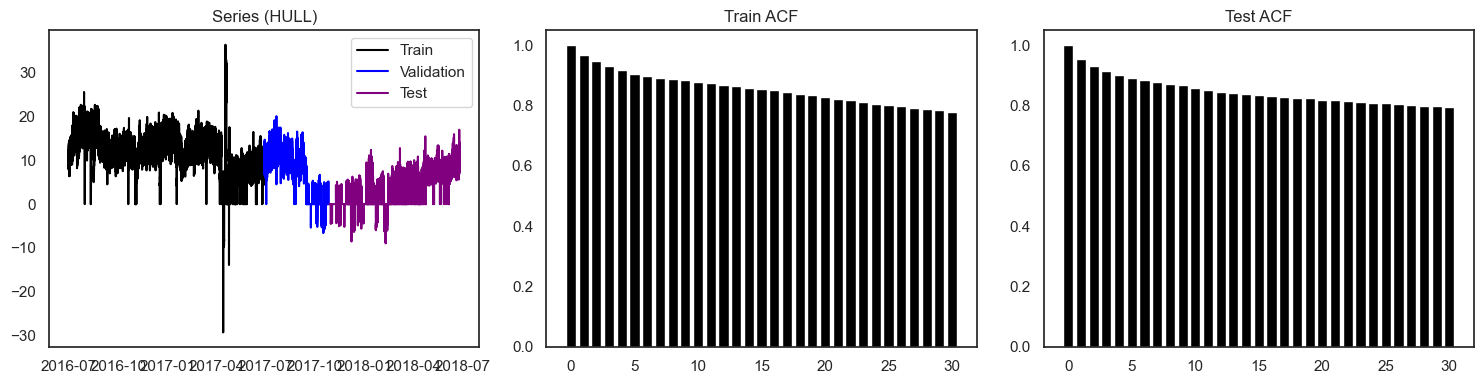

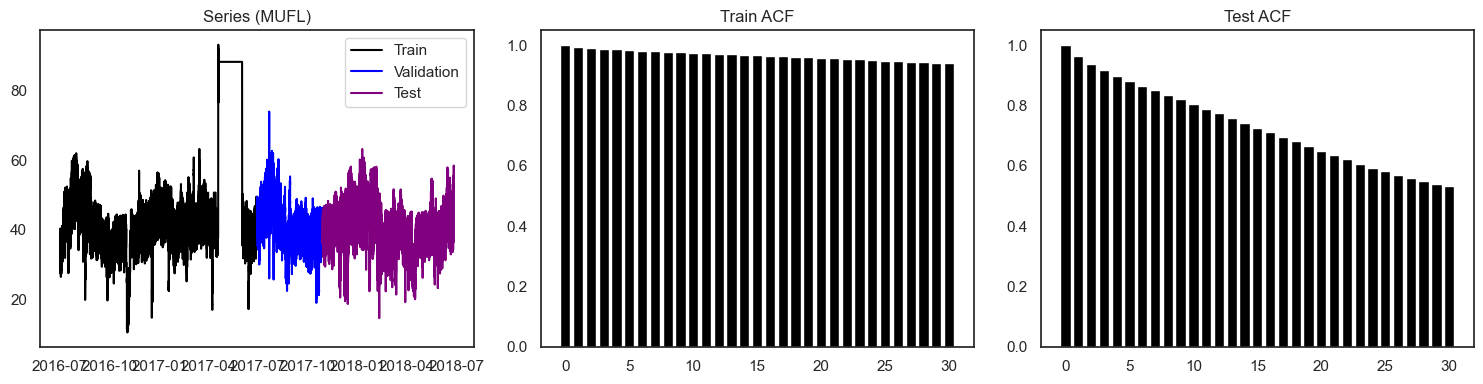

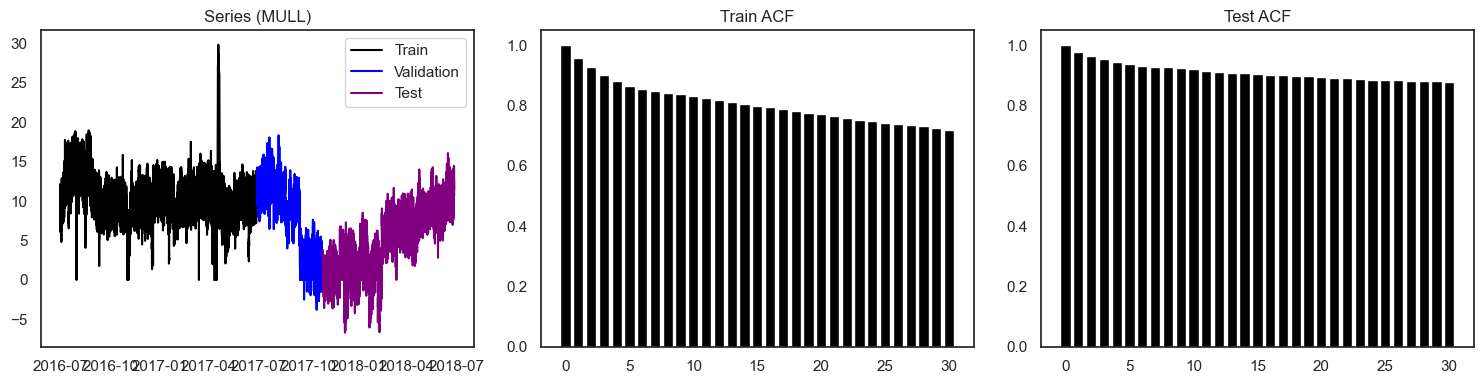

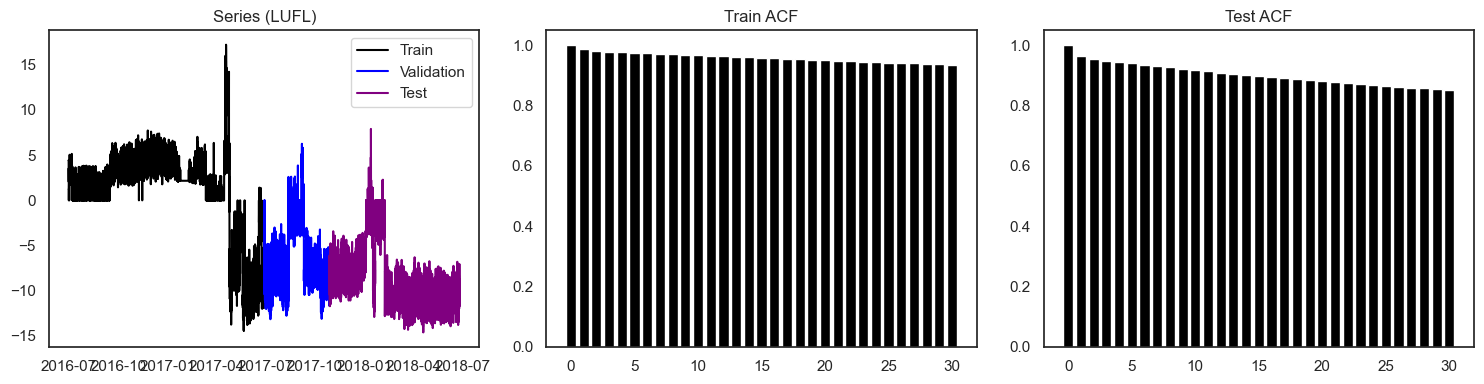

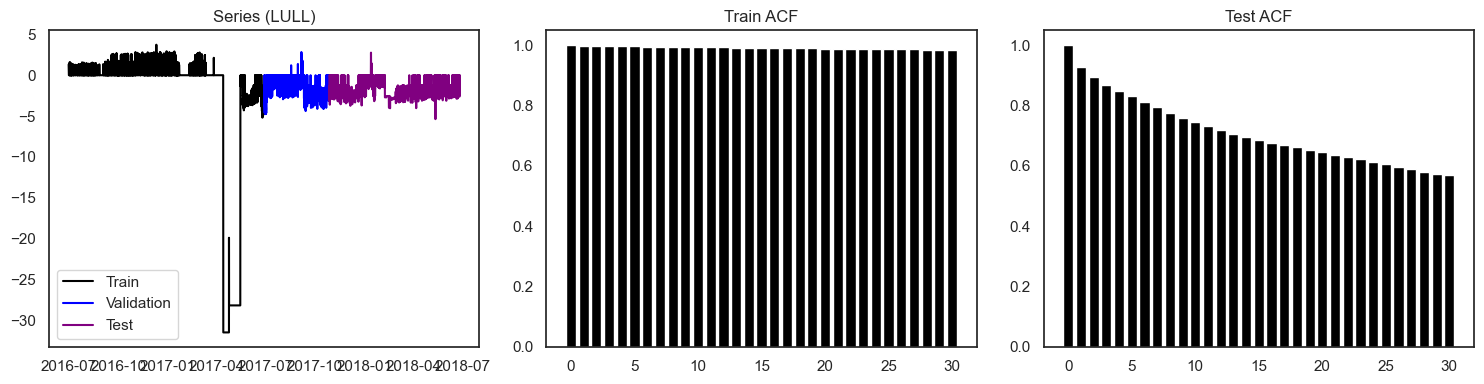

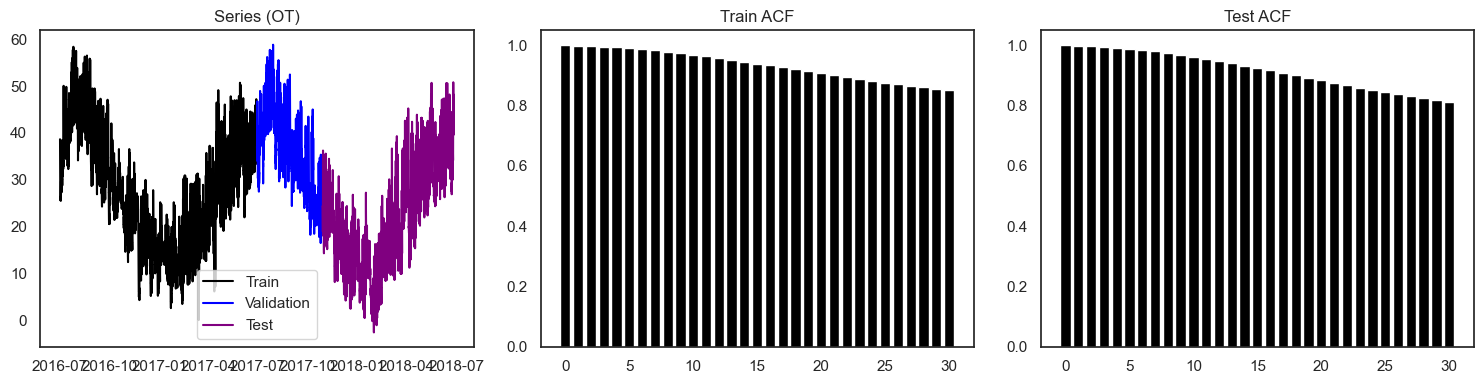

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the file path
file_path = Path('all_six_datasets/ETT-small/ETTm2.csv')

# Read the data
df = pd.read_csv(file_path, index_col='date', parse_dates=True)

# Define a function to split the dataset and plot the ACF graph
def plot_series_and_acf(data, column_name):
    # Calculate the index for splitting
    train_size = int(len(data) * 3 / 6)
    val_size = int(len(data) * 1 / 6)
    test_size = len(data) - train_size - val_size

    # Split the dataset
    train, val, test = np.split(data, [train_size, train_size + val_size])

    # Calculate ACF
    train_acf = acf(train[column_name], nlags=30)
    test_acf = acf(test[column_name], nlags=30)

    # Create subplots
    fig, ax = plt.subplots(1, 3, figsize=(15, 4)) # Adjust the overall figure size
    
    # Plot the time series
    ax[0].plot(train.index, train[column_name], color='black', label='Train')
    ax[0].plot(val.index, val[column_name], color='blue', label='Validation')
    ax[0].plot(test.index, test[column_name], color='purple', label='Test')
    ax[0].legend()
    ax[0].set_title(f'Series ({column_name})')
    
    # Plot ACF for the training set
    ax[1].bar(range(len(train_acf)), train_acf, color='black') # Set to black bars
    ax[1].set_title('Train ACF')
    
    # Plot ACF for the test set
    ax[2].bar(range(len(test_acf)), test_acf, color='black') # Set to black bars
    ax[2].set_title('Test ACF')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Analyze each column except the date
for column in df.columns:
    plot_series_and_acf(df, column)


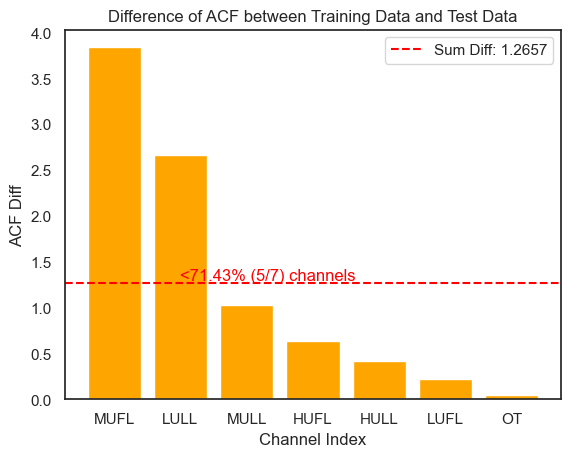

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf

# Load the dataset
file_path = 'all_six_datasets/ETT-small/ETTm2.csv'  # Replace with the actual path of your dataset
data = pd.read_csv(file_path, parse_dates=[0], index_col=0)

# Split the dataset into training and testing sets in chronological order
train_size = int(len(data) * 3 / 6)
test_size = int(len(data) * 2 / 6)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:train_size + test_size]

# Calculate the ACF difference for each channel
diff_acf = []
for col in data.columns:
    acf_train = acf(train_data[col], nlags=40)
    acf_test = acf(test_data[col], nlags=40)
    # Calculate the squared difference at each time lag
    diff_acf_col = np.square(acf_train - acf_test)
    # Sum the differences across all time lags for each channel, resulting in Diff_c
    diff_acf.append(np.sum(diff_acf_col))

# Sum the Diff_c for all channels, resulting in Diff_sum, and consider the normalization factor 1/C
diff_sum = np.sum(diff_acf) * (1 / len(data.columns))

# Calculate and sort the ACF differences for each channel
diff_acf_sorted = sorted([(col, diff) for col, diff in zip(data.columns, diff_acf)], key=lambda x: x[1], reverse=True)

# Unpack the sorted channels and their differences
channels, sorted_diff_acf = zip(*diff_acf_sorted)

# Plot the ACF difference for each channel
plt.bar(channels, sorted_diff_acf, color='orange')
plt.axhline(y=diff_sum, color='red', linestyle='--', label=f'Sum Diff: {diff_sum:.4f}')

# Calculate the percentage of channels below the average
below_average = len([diff for diff in sorted_diff_acf if diff < diff_sum])
percent_below = (below_average / len(sorted_diff_acf)) * 100
plt.text(1, diff_sum, f"<{percent_below:.2f}% ({below_average}/{len(sorted_diff_acf)}) channels", va='bottom', ha='left', color='red')

plt.legend()
plt.xlabel('Channel Index')
plt.ylabel('ACF Diff')
plt.title('Difference of ACF between Training Data and Test Data')
plt.show()


## 8 White noise

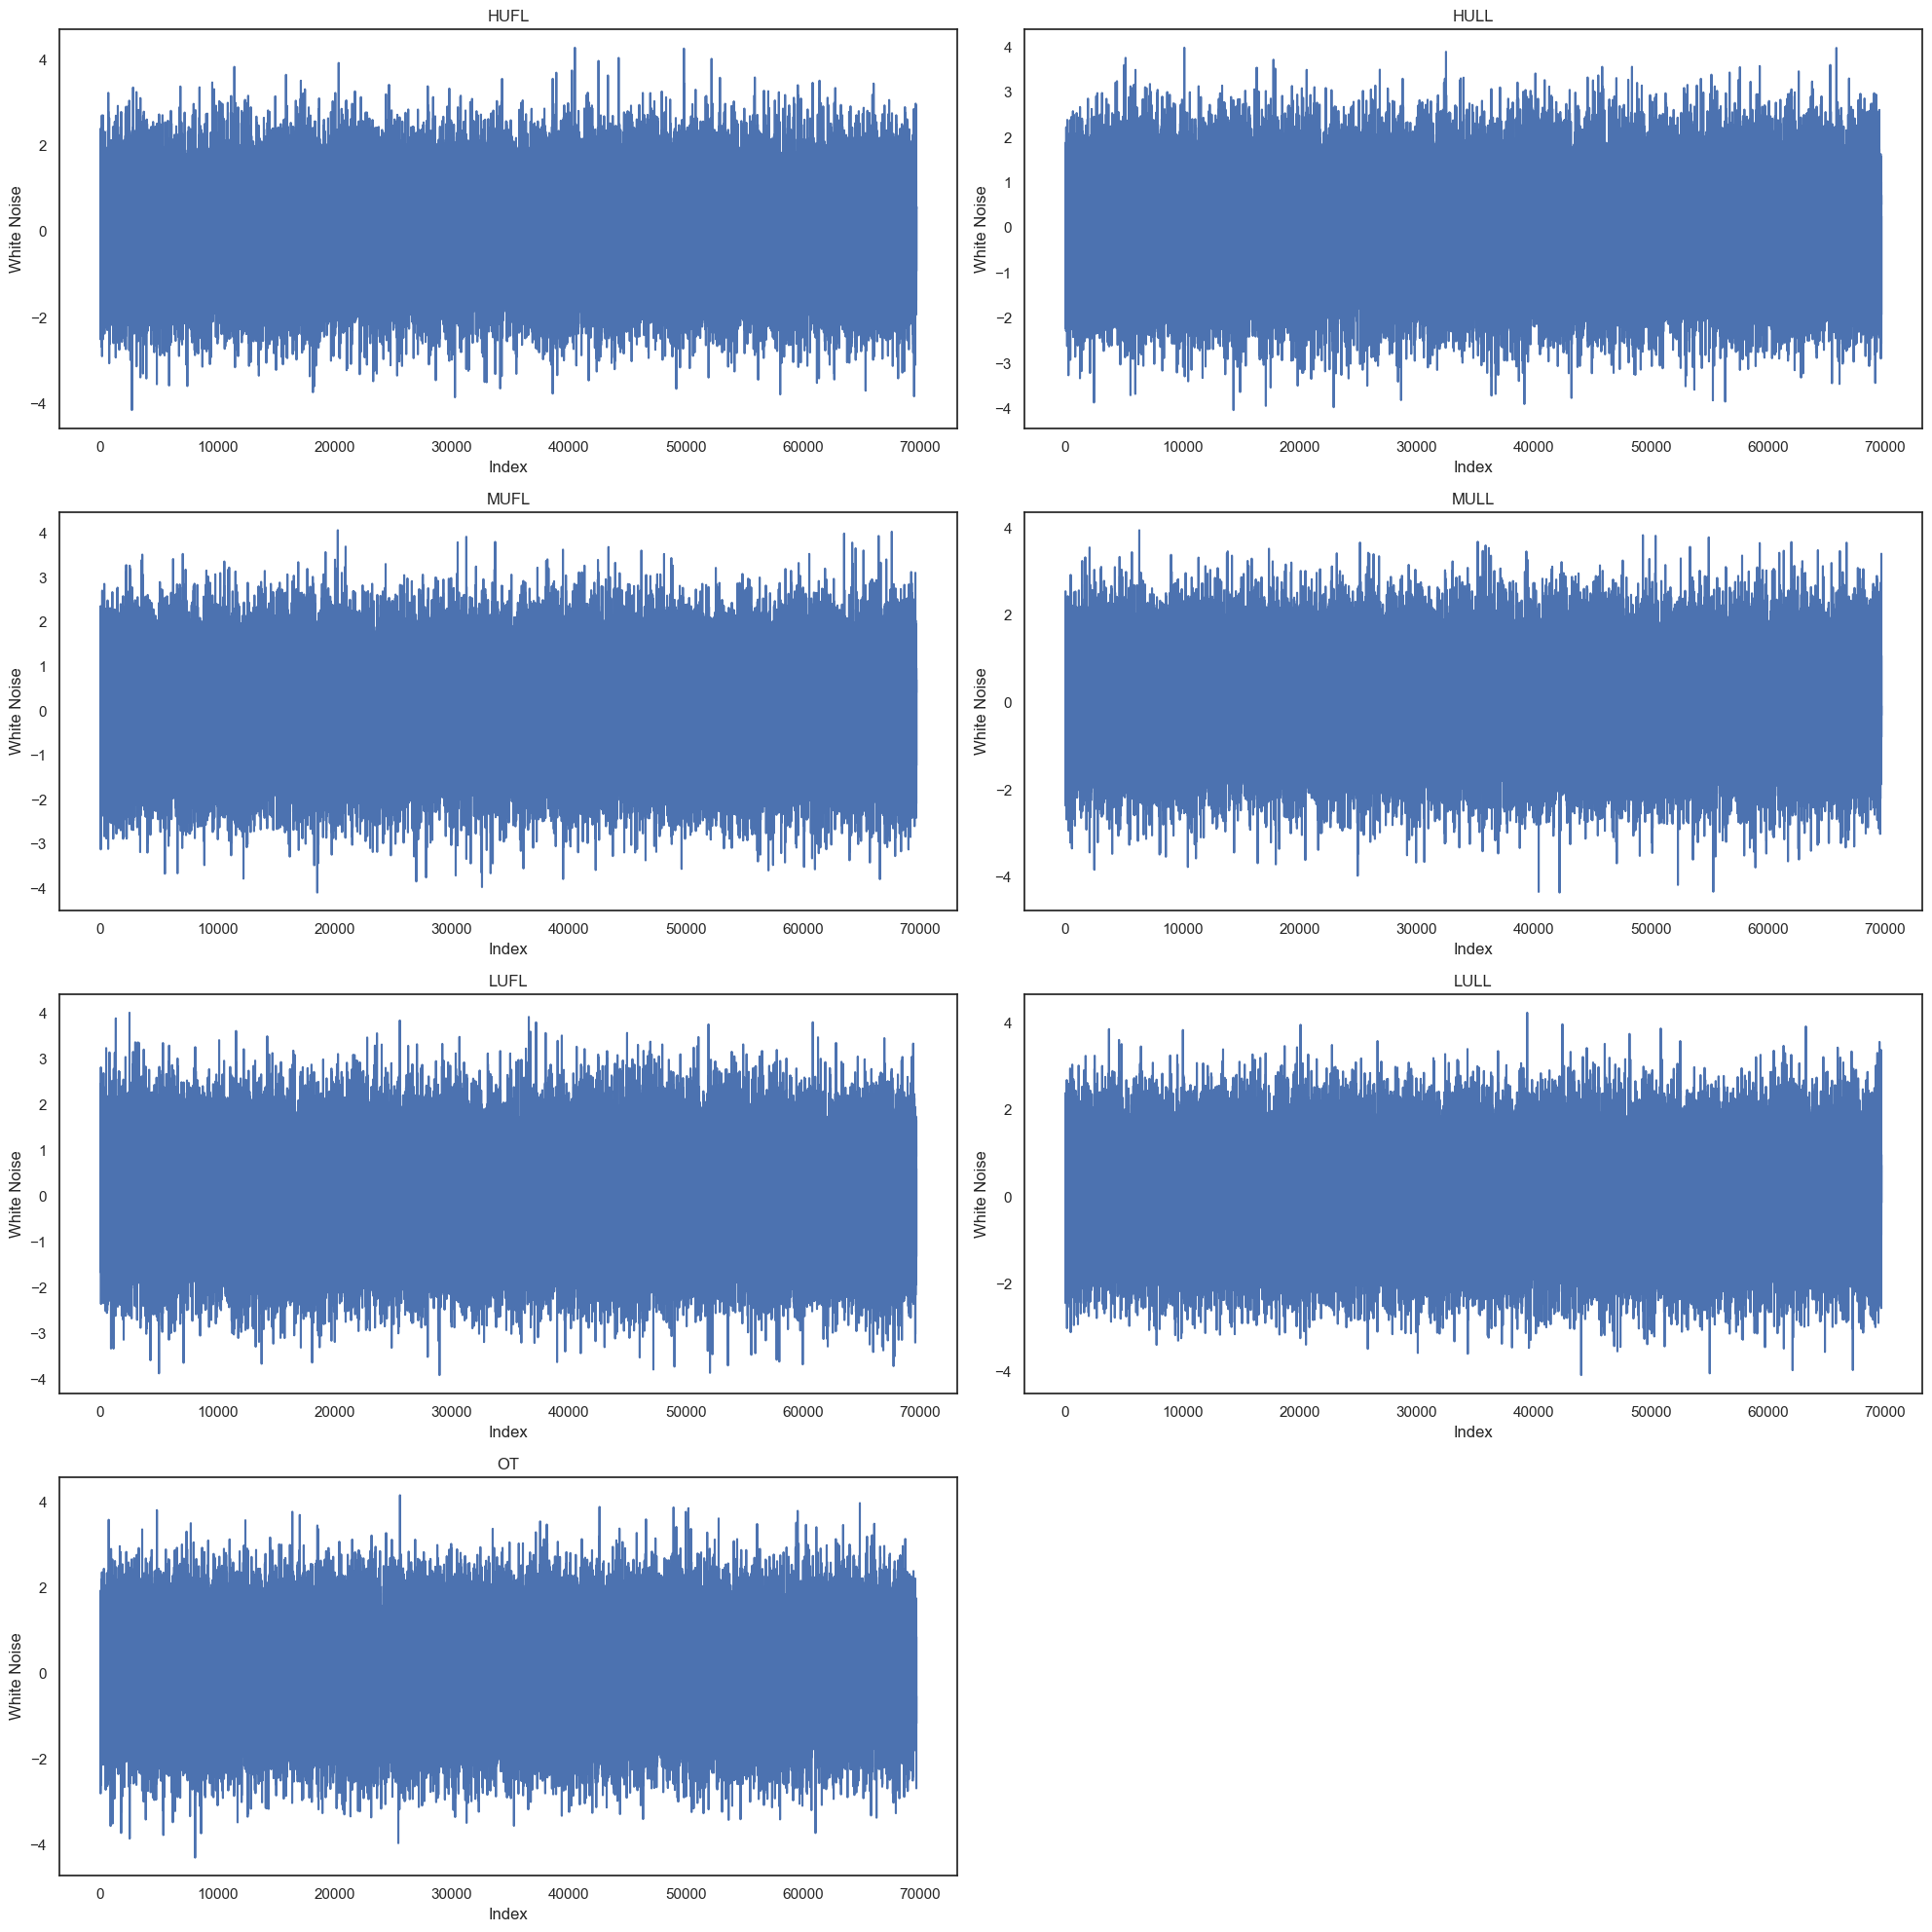

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Path setup
file_path = Path('all_six_datasets/ETT-small/ETTm2.csv')

# Reading the CSV file
data = pd.read_csv(file_path)

# Removing the date column
data_numeric = data.select_dtypes(include=[np.number])

# Generating and plotting white noise
fig, axs = plt.subplots(nrows=(len(data_numeric.columns) + 1) // 2, ncols=2, figsize=(20, 5 * ((len(data_numeric.columns) + 1) // 2)))
axs = axs.flatten()

for i, column in enumerate(data_numeric.columns):
    # Generating white noise for each column
    white_noise = np.random.normal(size=len(data_numeric[column]))
    
    # Plotting
    axs[i].plot(white_noise)
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('White Noise')

# Hiding any extra subplots
for ax in axs[i+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## 9 Granger Causality Test

              HUFL          HULL           MUFL           MULL          LUFL  \
HUFL  0.000000e+00  3.060169e-28   1.181578e-77  6.698167e-148  8.158186e-84   
HULL  2.649992e-81  0.000000e+00  5.853317e-127  9.247522e-266  3.925159e-46   
MUFL  5.846893e-82  1.003081e-43   0.000000e+00  8.206509e-108  1.504986e-02   
MULL  1.964987e-31  6.879424e-43   1.163860e-41   0.000000e+00  2.802281e-20   
LUFL  1.529397e-38  2.507472e-25   3.088486e-01   1.038859e-17  0.000000e+00   
LULL  2.709652e-02  7.795440e-02   1.349413e-05   3.407525e-04  9.037120e-28   
OT    8.058407e-31  3.836781e-14   6.952028e-07   8.551367e-04  2.745051e-28   

              LULL            OT  
HUFL  1.979192e-10  4.856279e-10  
HULL  5.647107e-09  1.083711e-24  
MUFL  2.895987e-46  1.661947e-23  
MULL  8.726497e-02  1.331132e-51  
LUFL  3.279772e-28  1.008197e-24  
LULL  0.000000e+00  9.476600e-07  
OT    1.492070e-05  0.000000e+00  


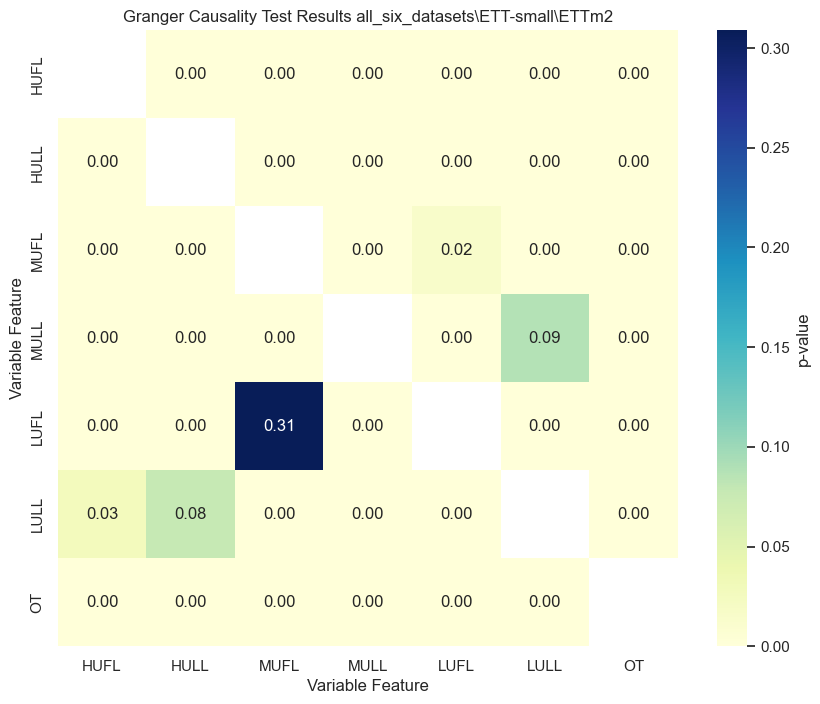

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from statsmodels.tsa.stattools import grangercausalitytests

# for file_path in files_all:
df = pd.read_csv('all_six_datasets/ETT-small/ETTm2.csv')
if 'date' in df.columns:
    df = df.drop('date', axis=1)
df = df.select_dtypes(include=[np.number])

max_lag = 4 # You can set the max lag that you want to test for
test = 'ssr_chi2test'  # Example test, you can also use 'lrtest', 'params_ftest', 'ssr_ftest'

results = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

for i in df.columns:
    for j in df.columns:
        if i != j:  # Avoid testing the correlation of the feature with itself
            test_result = grangercausalitytests(df[[i, j]], max_lag, verbose=False)
            min_p_value = np.min([test_result[k+1][0][test][1] for k in range(max_lag)])
            results.loc[i, j] = min_p_value

# results dataframe contains the p-values of the Granger causality tests
print(results)

# Assuming 'results' is the DataFrame obtained from the Granger causality test code
# Replace any diagonal elements with NaN to avoid self-comparison confusion
np.fill_diagonal(results.values, np.nan)

# Generate a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(results, annot=True, fmt=".2f", cmap="YlGnBu", mask=np.isnan(results), cbar_kws={'label': 'p-value'})
plt.title("Granger Causality Test Results " + str(file_path).split('/')[-1][:-4])
plt.xlabel("Variable Feature")
plt.ylabel("Variable Feature")
# plt.savefig('CoRR_heatmap/' + file_path.split('/')[-1][:-4] + '_Granger.png')
plt.show()

## 10 Probability Density Plots

In the image, three colors can be observed: blue, purple, and red. This is due to the partial overlap of the histograms for the training data (blue) and the testing data (red). When the two histograms overlay, their colors blend, resulting in a third color—in this case, purple.

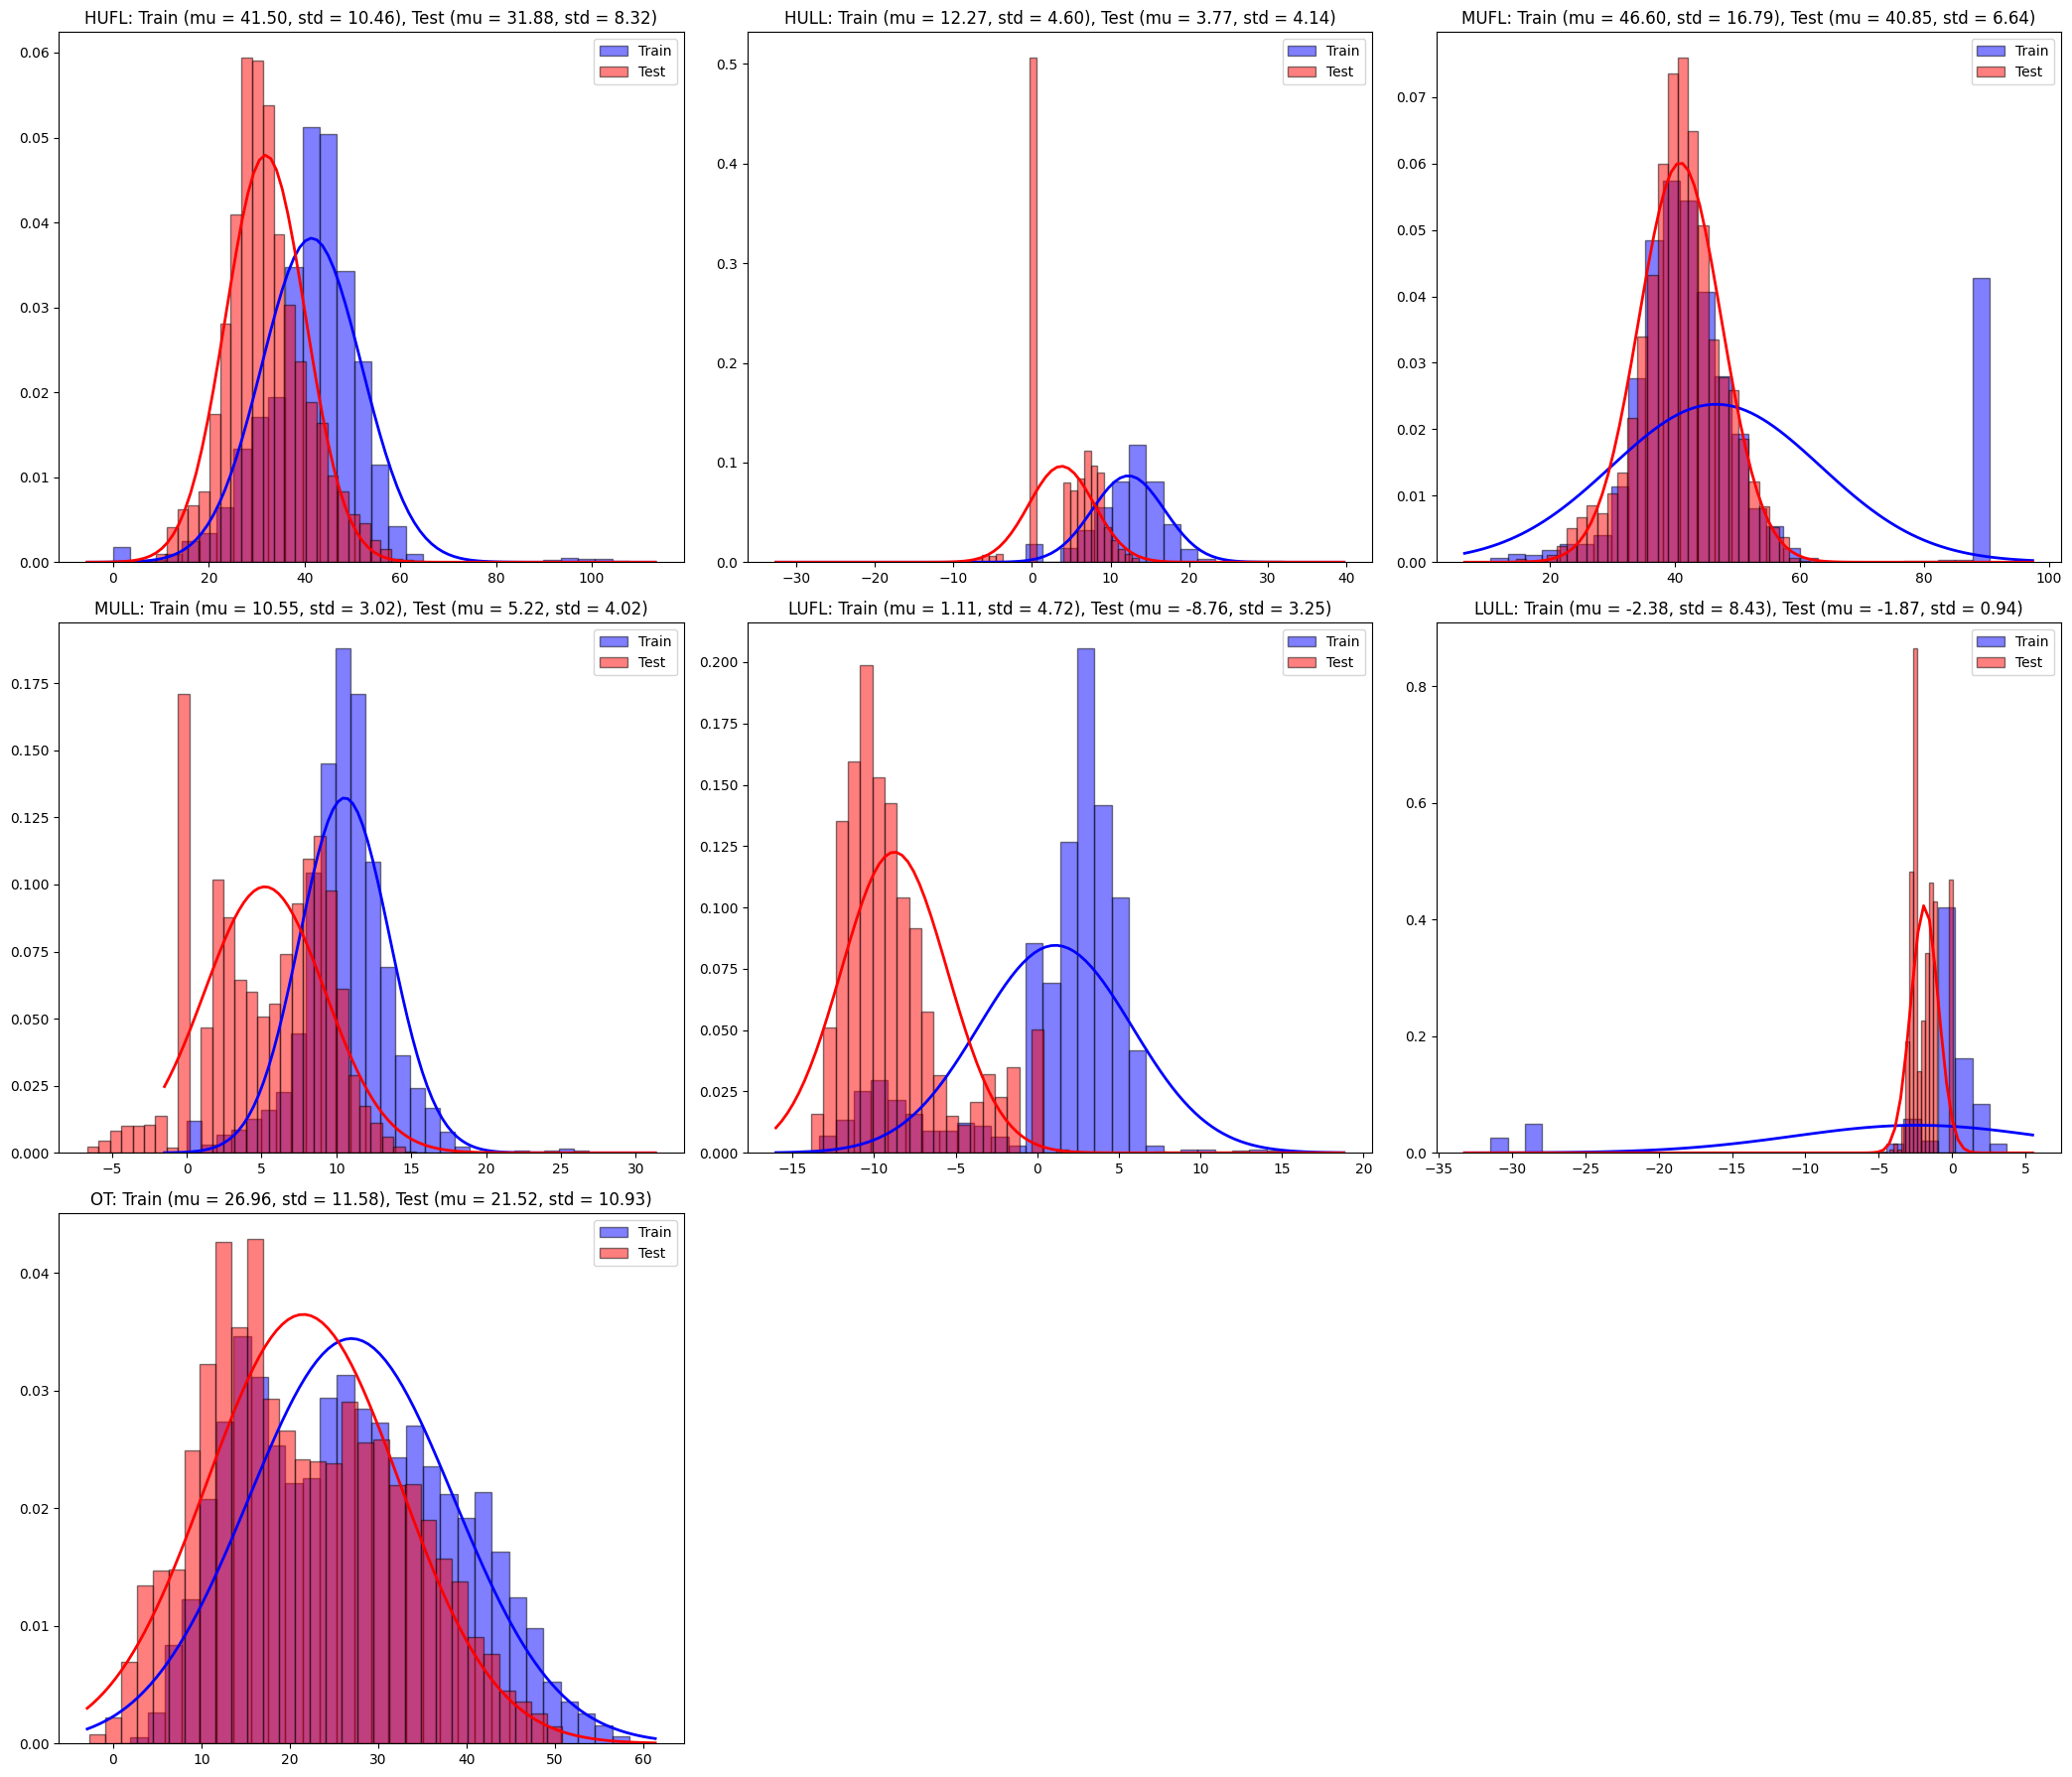

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pathlib import Path

# Set the file path
file_path = Path('all_six_datasets/ETT-small/ETTm2.csv')

# Load the data
df = pd.read_csv(file_path)

# Drop the date column and keep numeric data
df = df.select_dtypes(include=[np.number])

# Calculate indices for splitting the dataset into 3:1:2 ratio, but only use the 3 (train) and 2 (test) parts
total_rows = df.shape[0]
train_end_index = int(total_rows * 3 / 6)  # 3 parts for training
test_start_index = int(total_rows * 4 / 6)  # Skip 1 part, starting test from 4/6

# Determine the number of plots per row and the total number of rows
plots_per_row = 3
num_rows = np.ceil(df.shape[1] / plots_per_row).astype(int)

# Create a large figure
plt.figure(figsize=(plots_per_row * 7, num_rows * 6))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, plots_per_row, i + 1)
    # Split data into train and test
    train_data = df[column][:train_end_index]
    test_data = df[column][test_start_index:]
    
    # Training data histogram and PDF
    plt.hist(train_data, bins=30, density=True, alpha=0.5, color='b', edgecolor='black', label='Train')
    mu_train, std_train = norm.fit(train_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p_train = norm.pdf(x, mu_train, std_train)
    plt.plot(x, p_train, 'b', linewidth=2)
    
    # Test data histogram and PDF
    plt.hist(test_data, bins=30, density=True, alpha=0.5, color='r', edgecolor='black', label='Test')
    mu_test, std_test = norm.fit(test_data)
    p_test = norm.pdf(x, mu_test, std_test)
    plt.plot(x, p_test, 'r', linewidth=2)
    
    title = f"{column}: Train (mu = {mu_train:.2f}, std = {std_train:.2f}), Test (mu = {mu_test:.2f}, std = {std_test:.2f})"
    plt.title(title)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()
